<a href="https://colab.research.google.com/github/darshans0200/Colab/blob/master/SARIMA_Paneer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SARIMA

In [171]:
pwd

'/content'

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
df = pd.read_csv('/content/name1.csv', sep=',')
df['Stime'] = pd.to_datetime(df['Stime'],format="%d-%m-%Y")

In [174]:
df.columns

Index(['Id', 'Year', 'Month', 'Day', 'Stime', 'Item_number_ID',
       'Customer_Account_ID', 'regionID', 'Quantity', 'Amount',
       'SALESEXECUTIVEID', 'ASMID', 'ZONALHEADID', 'SALESHEADID'],
      dtype='object')

In [175]:
df.isnull().sum()

Id                          0
Year                        0
Month                       0
Day                         0
Stime                       0
Item_number_ID              0
Customer_Account_ID         0
regionID                    0
Quantity                    0
Amount                      0
SALESEXECUTIVEID       115251
ASMID                  369529
ZONALHEADID            254897
SALESHEADID                 0
dtype: int64

In [0]:
df=df.drop(['SALESEXECUTIVEID','ASMID','ZONALHEADID','SALESHEADID'],axis=1)

In [177]:
df.isnull().sum()

Id                     0
Year                   0
Month                  0
Day                    0
Stime                  0
Item_number_ID         0
Customer_Account_ID    0
regionID               0
Quantity               0
Amount                 0
dtype: int64

In [178]:
cols = list(pd.read_csv('/content/product1.csv', nrows =1))
print(cols)

['productId', 'productCategory', 'productName', 'Item_number_ID', 'Product', 'Sub_Product', 'Item_name', 'weight', 'weightUnit', 'HSNCode', 'shelfLife', 'purchaseRate', 'retailRate', 'maximumRate', 'minimumRate', 'GSTPercentage', 'photo', 'description', 'Createdt', 'CreateID', 'Updatedt', 'updateID', 'activeProduct']


In [0]:
prod=pd.read_csv('/content/product1.csv', sep=',',usecols =[i for i in cols if i != ('description')])
prod=prod.drop(['Createdt', 'CreateID','productId', 'productCategory','Updatedt','activeProduct','minimumRate','maximumRate','photo','updateID','HSNCode'], axis=1)

In [0]:
m=pd.merge(df, prod, on='Item_number_ID')

In [181]:
m.isnull().sum()

Id                     0
Year                   0
Month                  0
Day                    0
Stime                  0
Item_number_ID         0
Customer_Account_ID    0
regionID               0
Quantity               0
Amount                 0
productName            0
Product                0
Sub_Product            0
Item_name              0
weight                 0
weightUnit             0
shelfLife              0
purchaseRate           0
retailRate             0
GSTPercentage          0
dtype: int64

In [182]:
m.Product.unique()
for item in m.Product.unique():
    print (item)

BUTTER MILK
CHEESE
BUTTER
CREAM
CURD
YOGHURT
GHEE
KALAKHAND
KHOVA
LASSI
PANEER
PAYASAM
SHRIKHAND
WHEY POWDER
MISHTI DOI
MILK
GULAB JAMUN MIX


In [0]:
D=m.set_index('Stime')

In [184]:
D.shape

(789411, 19)

In [0]:
#D=m.set_index('Stime').groupby('Product')["Quantity"].resample("D").sum()
D=m.groupby(['Product', pd.Grouper(key='Stime', freq='D')])['Quantity'].sum()

In [186]:
D.head()

Product  Stime     
BUTTER   2018-04-01     1733
         2018-04-02     6916
         2018-04-03    11003
         2018-04-04    15689
         2018-04-05     7342
Name: Quantity, dtype: int64

In [0]:
D = D.reset_index(level=[0,1])

In [188]:
D.columns

Index(['Product', 'Stime', 'Quantity'], dtype='object')

In [189]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
Product     4495 non-null object
Stime       4495 non-null datetime64[ns]
Quantity    4495 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 105.4+ KB


In [190]:
D.index,D.shape

(RangeIndex(start=0, stop=4495, step=1), (4495, 3))

In [191]:
D.head()

,Product,Stime,Quantity
0,BUTTER,2018-04-01,1733
1,BUTTER,2018-04-02,6916
2,BUTTER,2018-04-03,11003
3,BUTTER,2018-04-04,15689
4,BUTTER,2018-04-05,7342


In [0]:
sale_per_product = D.groupby('Product')['Quantity'].sum().sort_values()

In [0]:
t=pd.DataFrame({'Product':sale_per_product.index, 'Quantity':sale_per_product.values})

In [194]:
t.head()

,Product,Quantity
0,WHEY POWDER,7423
1,KALAKHAND,25960
2,MILK,76668
3,PAYASAM,87315
4,GULAB JAMUN MIX,93449


In [0]:
D=D.set_index('Stime')

In [196]:
D.head()

,Product,Quantity
Stime,,
2018-04-01,BUTTER,1733
2018-04-02,BUTTER,6916
2018-04-03,BUTTER,11003
2018-04-04,BUTTER,15689
2018-04-05,BUTTER,7342


In [197]:
D.shape

(4495, 2)

In [198]:

D.columns,D.shape

(Index(['Product', 'Quantity'], dtype='object'), (4495, 2))

In [0]:
sources = D.groupby('Product')


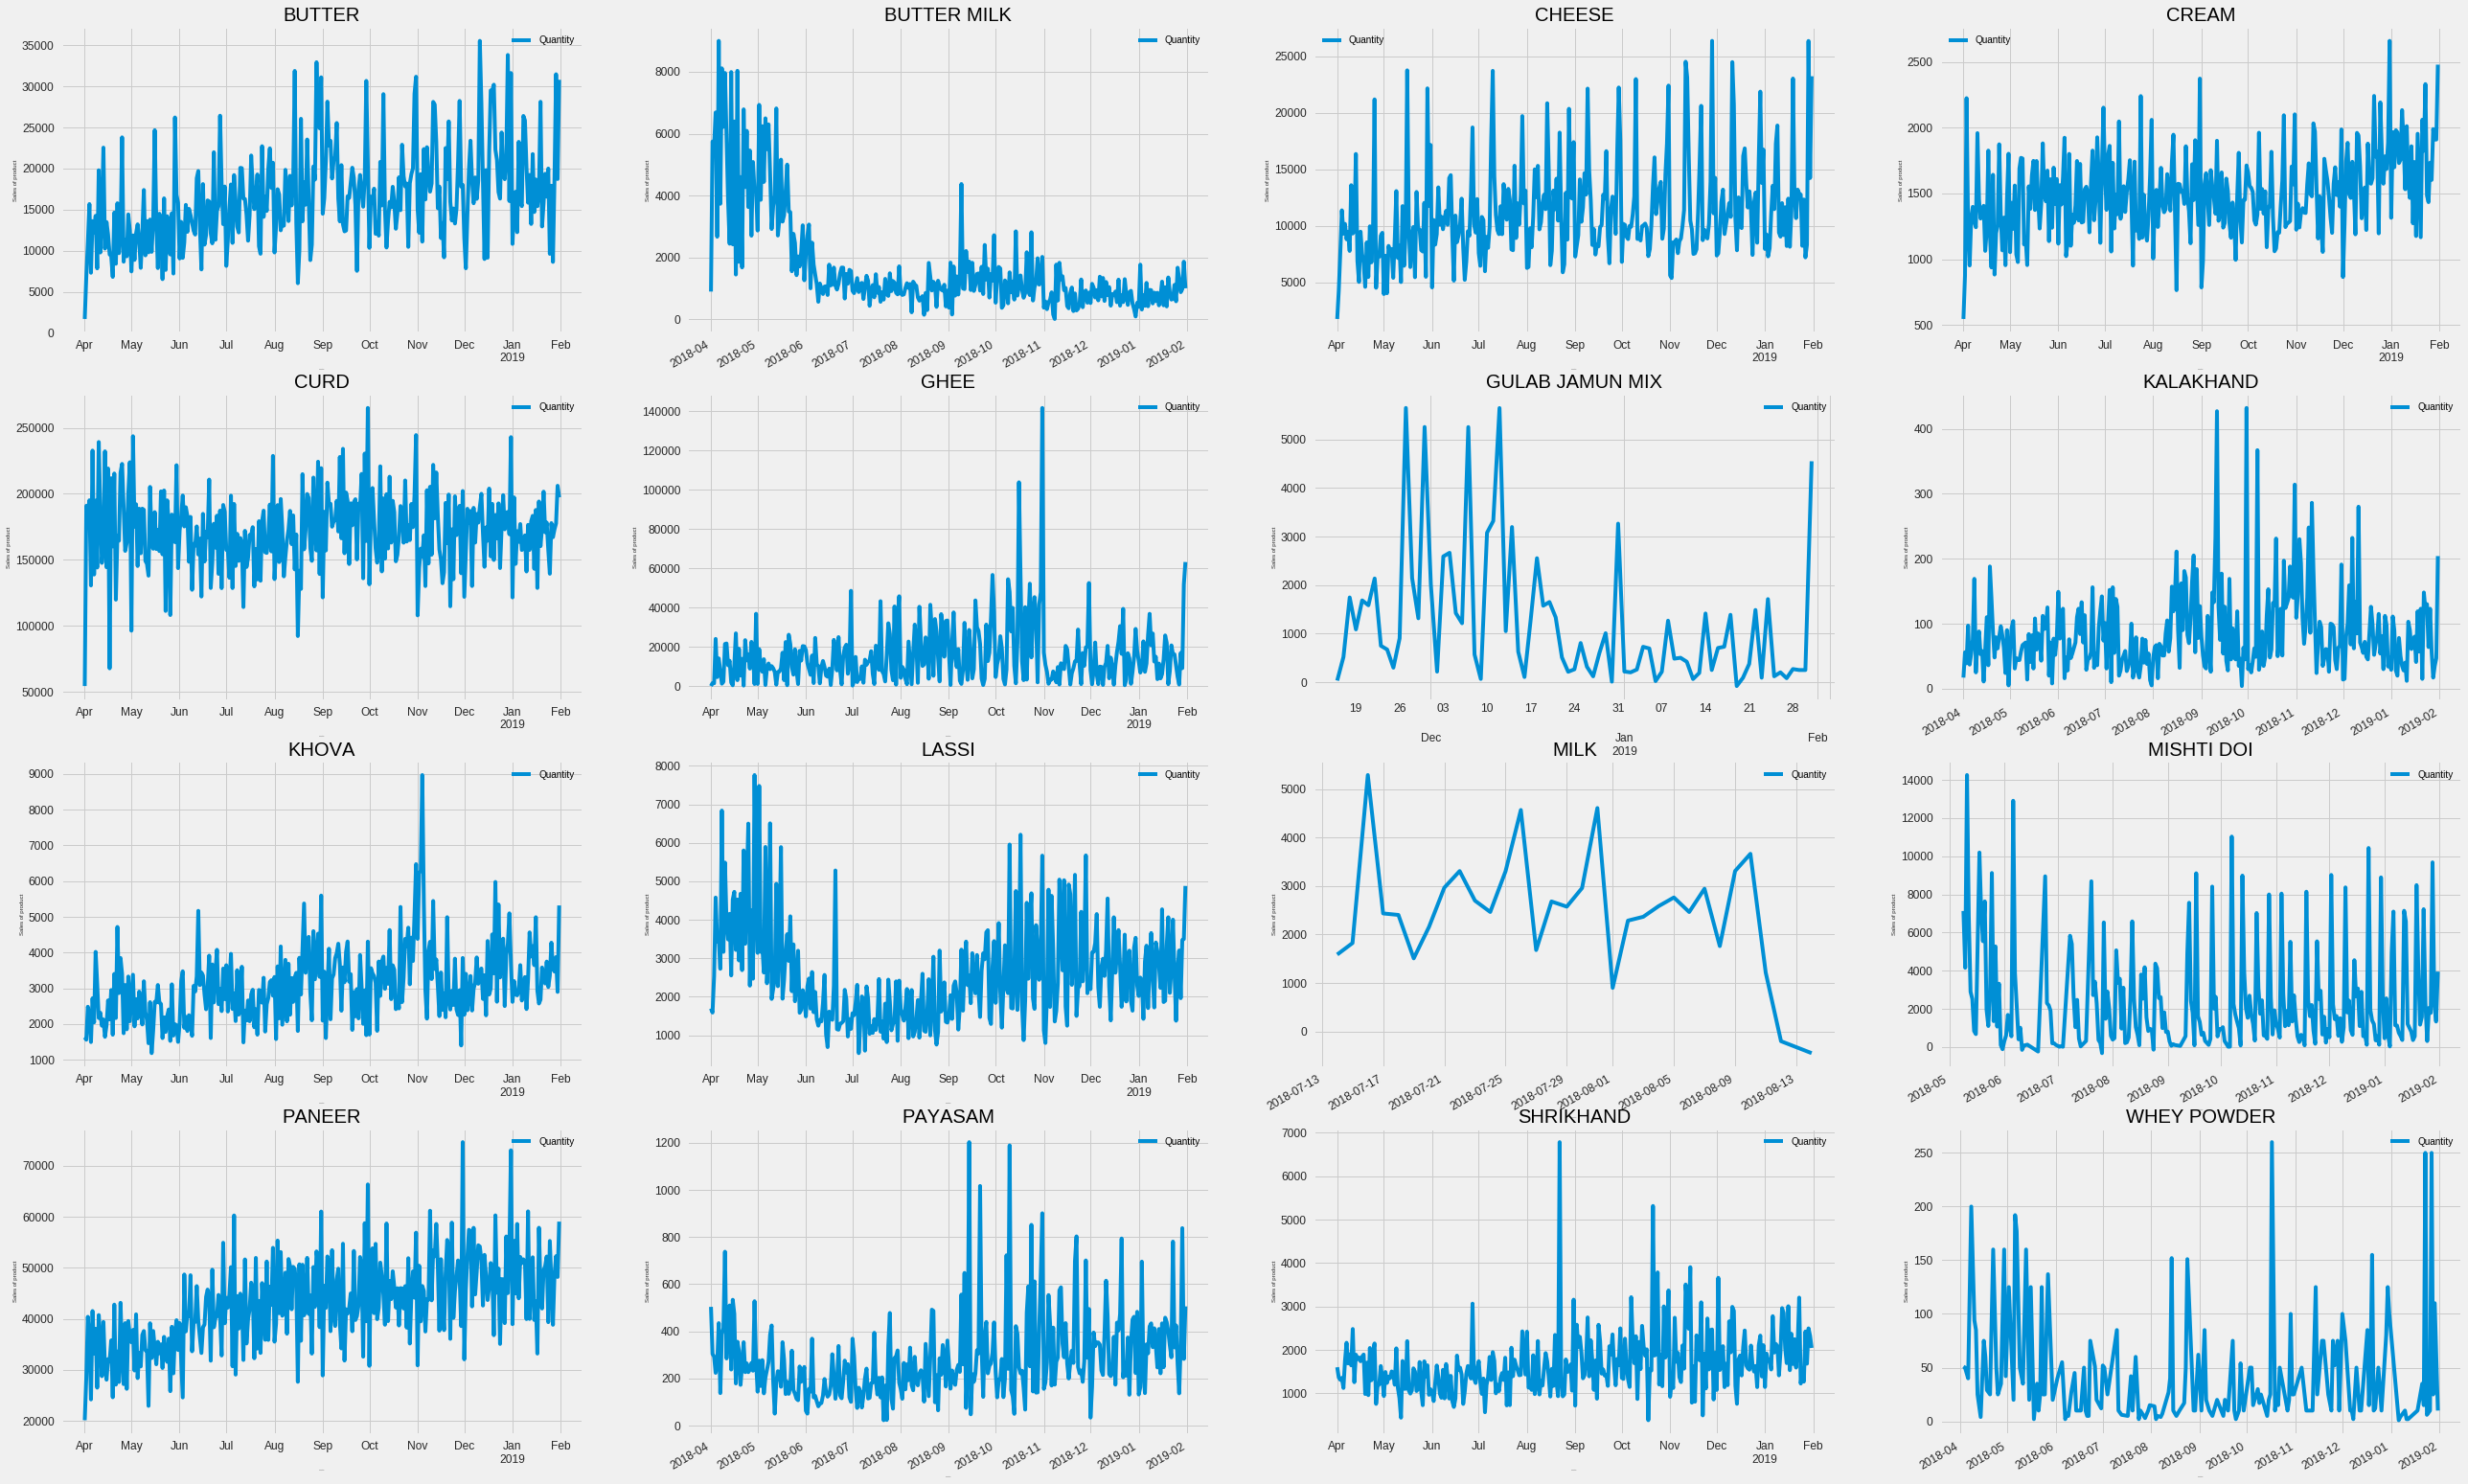

In [200]:
fig, axes = plt.subplots(4,4, figsize = (40, 30))
for (desc, group), ax in zip(sources, axes.flatten()):
    group.plot(x = group.index, y='Quantity',ax = ax, title=desc, fontsize = 12)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Sales of product')
    ax.xaxis.label.set_size(0)
    ax.yaxis.label.set_size(6)

In [0]:
#stk_list=['BUTTER MILK','CHEESE','BUTTER','CURD','YOGHURT','LASSI','PANEER']
#sources_on=D[D['Product'].isin(stk_list)]

In [0]:
paneer=m.loc[(m['Product'] == 'PANEER')]


#prd=sys.argv[1]
#paneer=m.loc[(m['Product']==a)]

In [202]:
paneer.shape

(114498, 20)

In [203]:
paneer['Quantity'].min(),paneer['Quantity'].max()

(-1000, 11255)

In [204]:
paneer['Stime'].min(),paneer['Stime'].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2019-01-31 00:00:00'))

In [205]:
paneer.shape

(114498, 20)

In [206]:
paneer.describe()

,Id,Year,Month,Day,regionID,Quantity,Amount,weight,shelfLife,purchaseRate,retailRate
count,114498.000000,114498.000000,114498.000000,114498.000000,114498.000000,114498.000000,114498.000000,114498.000000,114498.0,114498.000000,114498.000000
mean,394117.625714,2018.110788,7.464008,16.131129,21.185671,114.827176,11442.341702,150.236677,30.0,136.319806,196.226545
std,226852.324852,0.313871,3.327663,8.822668,10.041741,340.349641,24476.766540,164.164341,0.0,99.371755,141.976447
min,416.000000,2018.000000,1.000000,1.000000,1.000000,-1000.000000,-192000.000000,1.000000,30.0,29.930000,43.000000
25%,196987.250000,2018.000000,5.000000,9.000000,13.000000,15.000000,1355.000000,1.000000,30.0,54.190000,80.000000
50%,393878.500000,2018.000000,8.000000,16.000000,24.000000,40.000000,4313.400000,200.000000,30.0,127.890000,182.000000
75%,590565.750000,2018.000000,10.000000,24.000000,30.000000,110.000000,11861.850000,200.000000,30.0,226.450000,325.000000
max,788357.000000,2019.000000,12.000000,31.000000,37.000000,11255.000000,600000.000000,500.000000,30.0,1050.840000,1510.000000


In [207]:
paneer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114498 entries, 364831 to 779515
Data columns (total 20 columns):
Id                     114498 non-null int64
Year                   114498 non-null int64
Month                  114498 non-null int64
Day                    114498 non-null int64
Stime                  114498 non-null datetime64[ns]
Item_number_ID         114498 non-null object
Customer_Account_ID    114498 non-null object
regionID               114498 non-null int64
Quantity               114498 non-null int64
Amount                 114498 non-null float64
productName            114498 non-null object
Product                114498 non-null object
Sub_Product            114498 non-null object
Item_name              114498 non-null object
weight                 114498 non-null int64
weightUnit             114498 non-null object
shelfLife              114498 non-null int64
purchaseRate           114498 non-null float64
retailRate             114498 non-null int64
GSTPercen

In [208]:
paneer.shape,paneer.columns

((114498, 20), Index(['Id', 'Year', 'Month', 'Day', 'Stime', 'Item_number_ID',
        'Customer_Account_ID', 'regionID', 'Quantity', 'Amount', 'productName',
        'Product', 'Sub_Product', 'Item_name', 'weight', 'weightUnit',
        'shelfLife', 'purchaseRate', 'retailRate', 'GSTPercentage'],
       dtype='object'))

In [0]:
cols = ['Id', 'Year', 'Month', 'Day', 'Item_number_ID',
        'Customer_Account_ID', 'regionID', 'Amount', 'productName',
        'Product', 'Sub_Product', 'Item_name', 'weight', 'weightUnit',
        'shelfLife', 'purchaseRate', 'retailRate', 'GSTPercentage']
paneer.drop(cols, axis=1, inplace=True)
#df = df.sort_values('Stime')

In [210]:
paneer.isnull().sum()

Stime       0
Quantity    0
dtype: int64

In [211]:
paneer.columns

Index(['Stime', 'Quantity'], dtype='object')

In [212]:
paneer.head()

,Stime,Quantity
364831,2018-04-01,650
364832,2018-04-01,24
364833,2018-04-01,200
364834,2018-04-01,20
364835,2018-04-01,60


In [0]:
paneer=paneer.resample('D', on='Stime').sum()

In [214]:
paneer.describe()

,Quantity
count,306.000000
mean,42965.627451
std,8873.266070
min,20142.000000
25%,37096.750000
50%,42214.000000
75%,49749.500000
max,74633.000000


In [215]:
paneer.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306 entries, 2018-04-01 to 2019-01-31
Freq: D
Data columns (total 1 columns):
Quantity    306 non-null int64
dtypes: int64(1)
memory usage: 4.8 KB


In [216]:
paneer.head()

,Quantity
Stime,
2018-04-01,20142
2018-04-02,28619
2018-04-03,40404
2018-04-04,36663
2018-04-05,24211


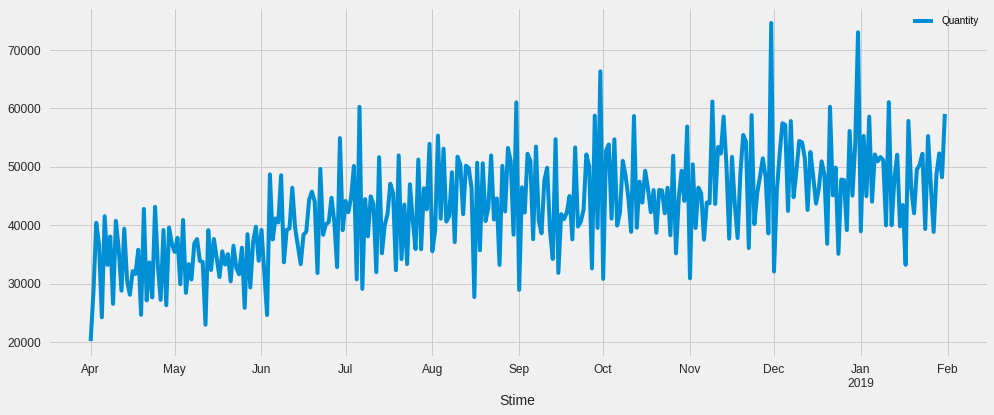

In [217]:
paneer.plot(figsize=(15, 6))
plt.show()

In [0]:
def timeseries_train_test_split(paneer, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(paneer)*(1-test_size))
    
    X_train = paneer.iloc[:test_index]
    X_test = paneer.iloc[test_index:]

    
    return X_train, X_test

In [0]:
X_train, X_test = timeseries_train_test_split(paneer, test_size=0.3)

In [220]:

X_train.tail()

,Quantity
Stime,
2018-10-27,35169
2018-10-28,44676
2018-10-29,49313
2018-10-30,44150
2018-10-31,56895


In [221]:
X_test.tail()

,Quantity
Stime,
2019-01-27,38839
2019-01-28,48669
2019-01-29,52285
2019-01-30,48212
2019-01-31,59053


In [0]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1296x576 with 0 Axes>

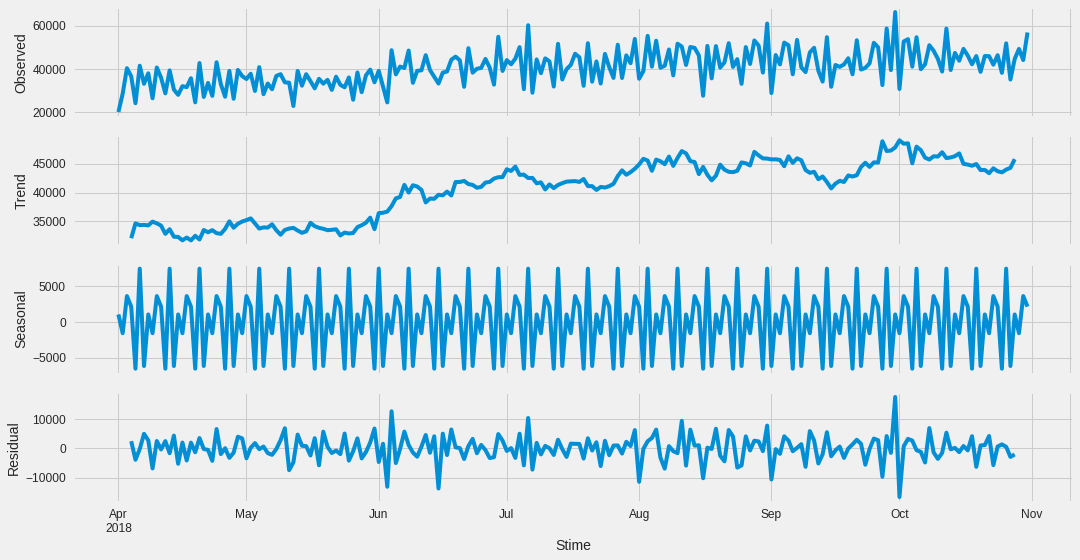

In [223]:
decomposition = seasonal_decompose(X_train.Quantity)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

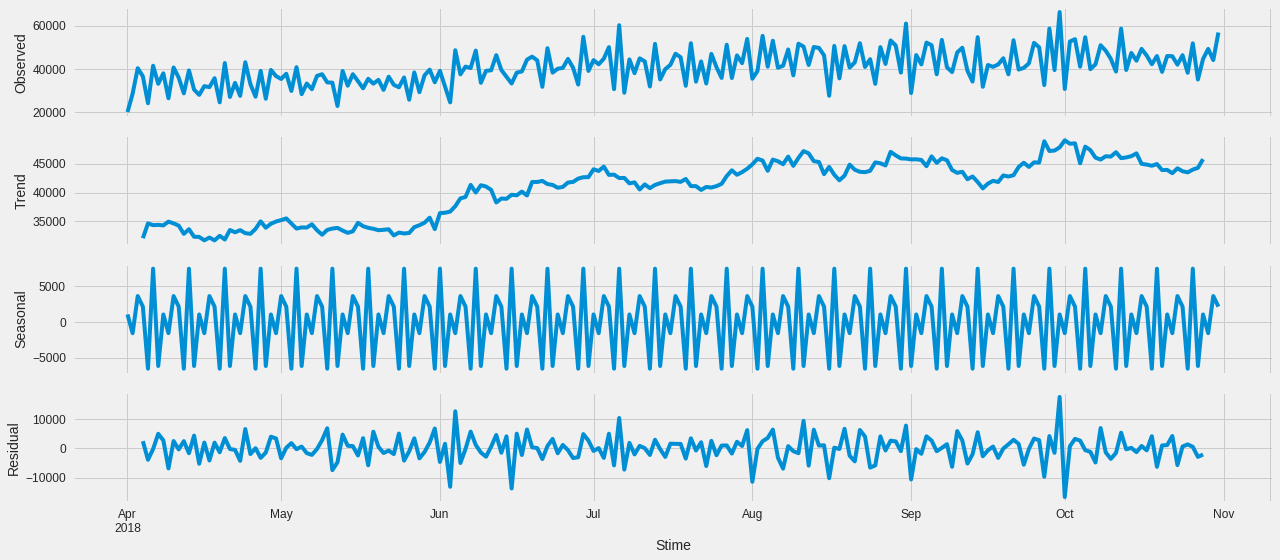

In [224]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(X_train, model='additive')
fig = decomposition.plot()
plt.show()

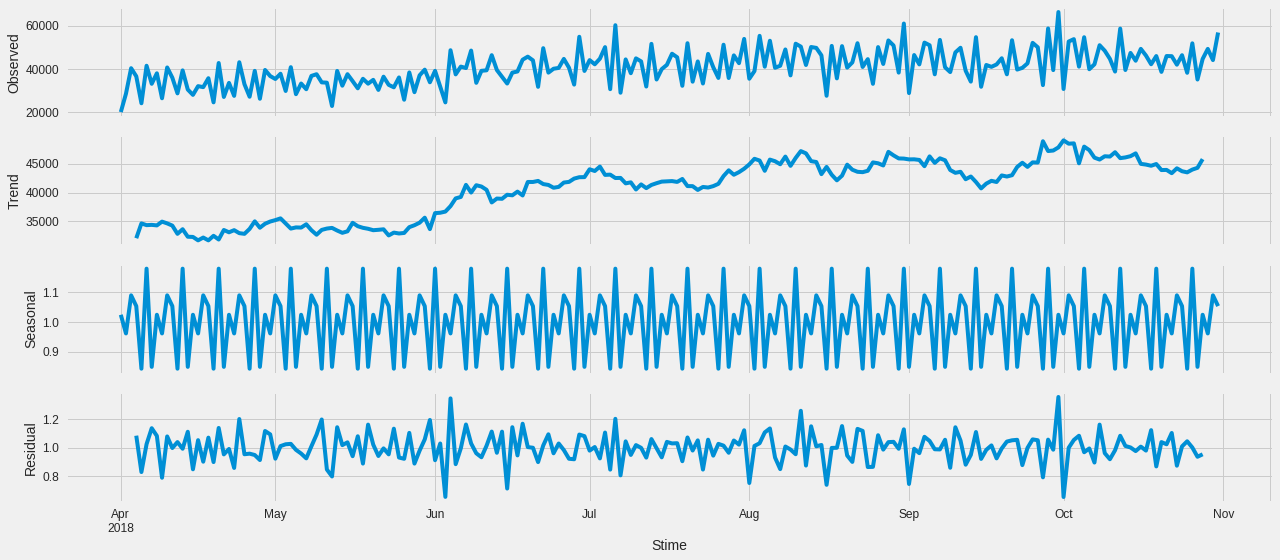

In [225]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(X_train, model='multiplicative')
fig = decomposition.plot()
plt.show()

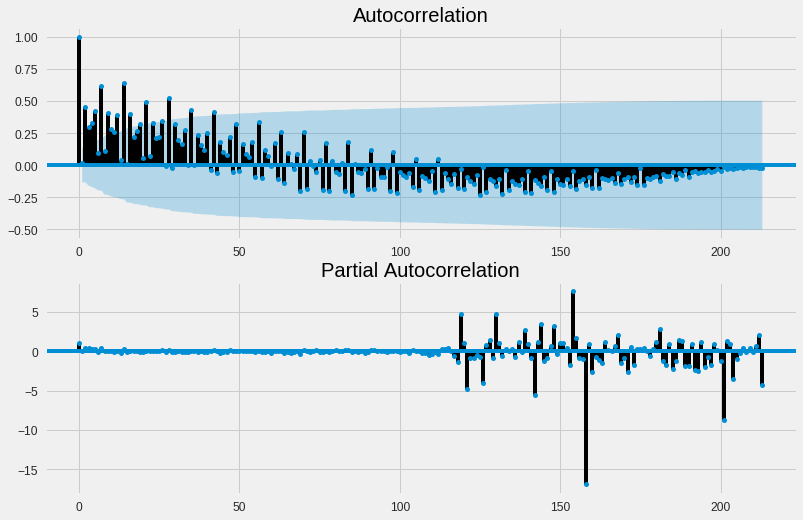

In [53]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X_train['Quantity'], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X_train['Quantity'], ax=ax2)
plt.show()

In [54]:
pip install pmdarima

In [36]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(paneer, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=5, m=12,
                         start_P=0, seasonal=True,
                         d=0, D=0, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=6396.025, BIC=6414.643, Fit time=0.586 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=6405.893, BIC=6420.788, Fit time=1.067 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=6399.254, BIC=6414.148, Fit time=0.285 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=6428.445, BIC=6443.340, Fit time=0.212 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 2, 12); AIC=6377.580, BIC=6399.922, Fit time=1.217 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 2, 12); AIC=6376.392, BIC=6395.010, Fit time=0.780 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 2, 12); AIC=6381.361, BIC=6396.255, Fit time=0.570 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 2, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  306
Model:             SARIMAX(3, 0, 4)x(0, 0, 1, 12)   Log Likelihood               -3101.026
Date:                            Sat, 23 Mar 2019   AIC                           6222.053
Time:                                    02:20:38   BIC                           6259.289
Sample:                                         0   HQIC                          6236.945
                                            - 306                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6681.4865   3642.941      1.834      0.067    -458.547    1.38e+04
ar.L1         -0.8368      0.024    -34.995      0.000      -0.884      -0.790
ar.L2          0.7241      0.041     17.727      0.000       0.644       0.804
ar.L3          0.9567      0.023     42.341      0.000       0.912       1.001
ma.L1          0.8057      0.080     10.080      0.000       0.649       0.962
ma.L2         -0.4487      0.103     -4.370      0.000      -0.650      -0.247
ma.L3         -0.4758      0.097     -4.881      0.000      -0.667      -0.285
ma.L4          0.2479      0.072      3.427      0.001       0.106       0.390
ma.S.L12      -0.1518      0.072     -2.108      0.035      -0.293      -0.011
sigma2      4.236e+07      0.881   4.81e+07      0.000    4.24e+07    4.24e+07
===================================================================================
Ljung-Box (Q):                      127.57   Jarque-Bera (JB):                20.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.31
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.98e+22. Standard errors may be unstable.
"""

In [37]:
p = q = range(0,5)
d=range(0,1)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [38]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(paneer,
                                            order=param,
                                          
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6924.029618372684
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6609.293853630634
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:6324.081294872584
ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:6038.580607069964
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6220.6146614770405
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6165.7723920922635
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:5897.470910930756
ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:5644.660203146585
ARIMA(0, 0, 0)x(1, 0, 4, 12)12 - AIC:5382.158384618945
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:5922.791587009493
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:5921.229266404179
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:5899.378891767513
ARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:5645.365070871966
ARIMA(0, 0, 0)x(2, 0, 4, 12)12 - AIC:5370.366281796475
ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:5677.079345665083
ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:5666.752278130578


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:5664.734623969685


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:5639.386011914326


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 0)x(3, 0, 4, 12)12 - AIC:5372.740650297563
ARIMA(0, 0, 0)x(4, 0, 0, 12)12 - AIC:5420.509853334212
ARIMA(0, 0, 0)x(4, 0, 1, 12)12 - AIC:5408.931487283476


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 0)x(4, 0, 2, 12)12 - AIC:5382.301967314459


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 0)x(4, 0, 3, 12)12 - AIC:5384.9208439859885


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 0)x(4, 0, 4, 12)12 - AIC:5379.354538594578
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7186.682493238346
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6847.680427702528
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:6548.388924172134
ARIMA(0, 0, 1)x(0, 0, 3, 12)12 - AIC:6264.297523956791
ARIMA(0, 0, 1)x(0, 0, 4, 12)12 - AIC:5979.818515275718
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6846.089742872089
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6799.582703081813
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:6521.843567790371
ARIMA(0, 0, 1)x(1, 0, 3, 12)12 - AIC:6244.560833950567
ARIMA(0, 0, 1)x(1, 0, 4, 12)12 - AIC:5966.497595902461
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:5892.71070200869
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:6568.268659194835
ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:6523.681389230995
ARIMA(0, 0, 1)x(2, 0, 3, 12)12 - AIC:6246.571019564775
ARIMA(0, 0, 1)x(2, 0, 4, 12)12 - AIC:5968.496790736213
ARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:6289.293010268146
ARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:6291.068308487633
ARIMA(0, 0,

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 1)x(4, 0, 3, 12)12 - AIC:6017.68381444921
ARIMA(0, 0, 1)x(4, 0, 4, 12)12 - AIC:5972.474459865294
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:7105.484438207925
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:6808.510898976135
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:6520.591884794705
ARIMA(0, 0, 2)x(0, 0, 3, 12)12 - AIC:6238.767357468319
ARIMA(0, 0, 2)x(0, 0, 4, 12)12 - AIC:5956.4879976007305
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:6848.12351806861
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:6778.094798951009
ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:6500.059597575546
ARIMA(0, 0, 2)x(1, 0, 3, 12)12 - AIC:6222.61243915369
ARIMA(0, 0, 2)x(1, 0, 4, 12)12 - AIC:5944.951926684064
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:6568.0349440646
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:6569.794169040655
ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:6501.972368337243


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 2)x(2, 0, 3, 12)12 - AIC:6224.588375493726
ARIMA(0, 0, 2)x(2, 0, 4, 12)12 - AIC:5946.921978555992
ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:6290.7523398923895
ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:6292.494845732183
ARIMA(0, 0, 2)x(3, 0, 2, 12)12 - AIC:6294.436160339597


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 2)x(3, 0, 3, 12)12 - AIC:6226.230204663088


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 2)x(3, 0, 4, 12)12 - AIC:5949.136993800223
ARIMA(0, 0, 2)x(4, 0, 0, 12)12 - AIC:6013.476158191578
ARIMA(0, 0, 2)x(4, 0, 1, 12)12 - AIC:6015.326402940926


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 2)x(4, 0, 2, 12)12 - AIC:6017.073652188524


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 2)x(4, 0, 3, 12)12 - AIC:6018.82556671551


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 2)x(4, 0, 4, 12)12 - AIC:5951.026978454085
ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:7071.8800332052415
ARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:6779.474572239144
ARIMA(0, 0, 3)x(0, 0, 2, 12)12 - AIC:6495.768062537227
ARIMA(0, 0, 3)x(0, 0, 3, 12)12 - AIC:6215.047472157128
ARIMA(0, 0, 3)x(0, 0, 4, 12)12 - AIC:5933.461812012531
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:6851.9707417807585
ARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:6758.856226707343
ARIMA(0, 0, 3)x(1, 0, 2, 12)12 - AIC:6481.015698200163
ARIMA(0, 0, 3)x(1, 0, 3, 12)12 - AIC:6203.512755869819
ARIMA(0, 0, 3)x(1, 0, 4, 12)12 - AIC:5925.818386282259
ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:6572.314792222007
ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:6573.993024919123
ARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:6482.9604571777345
ARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:6205.569276078297


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 3)x(2, 0, 4, 12)12 - AIC:5927.801734879649


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:5628.281827932592
ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:6296.634305065472


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 3)x(3, 0, 2, 12)12 - AIC:6298.5920597625845
ARIMA(0, 0, 3)x(3, 0, 3, 12)12 - AIC:6207.145557261332


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 3)x(3, 0, 4, 12)12 - AIC:5929.920672388804
ARIMA(0, 0, 3)x(4, 0, 0, 12)12 - AIC:6017.534422809658
ARIMA(0, 0, 3)x(4, 0, 1, 12)12 - AIC:6019.349671629285


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 3)x(4, 0, 2, 12)12 - AIC:6021.173443346458


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 3)x(4, 0, 3, 12)12 - AIC:6023.386714153969


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 3)x(4, 0, 4, 12)12 - AIC:5931.940800959845
ARIMA(0, 0, 4)x(0, 0, 0, 12)12 - AIC:7038.730528848326
ARIMA(0, 0, 4)x(0, 0, 1, 12)12 - AIC:6752.322436939727
ARIMA(0, 0, 4)x(0, 0, 2, 12)12 - AIC:6470.613615996683
ARIMA(0, 0, 4)x(0, 0, 3, 12)12 - AIC:6190.719548061994
ARIMA(0, 0, 4)x(0, 0, 4, 12)12 - AIC:5911.017748028339
ARIMA(0, 0, 4)x(1, 0, 0, 12)12 - AIC:6855.78746697753
ARIMA(0, 0, 4)x(1, 0, 1, 12)12 - AIC:6739.227841040029
ARIMA(0, 0, 4)x(1, 0, 2, 12)12 - AIC:6461.341018839965
ARIMA(0, 0, 4)x(1, 0, 3, 12)12 - AIC:6183.891886550698
ARIMA(0, 0, 4)x(1, 0, 4, 12)12 - AIC:5906.148713597762
ARIMA(0, 0, 4)x(2, 0, 0, 12)12 - AIC:6576.028999168604
ARIMA(0, 0, 4)x(2, 0, 1, 12)12 - AIC:6577.679162728027
ARIMA(0, 0, 4)x(2, 0, 2, 12)12 - AIC:6463.293432547139
ARIMA(0, 0, 4)x(2, 0, 3, 12)12 - AIC:6185.950401044618


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 4)x(2, 0, 4, 12)12 - AIC:5908.118044417062
ARIMA(0, 0, 4)x(3, 0, 0, 12)12 - AIC:6298.604185985881
ARIMA(0, 0, 4)x(3, 0, 1, 12)12 - AIC:6300.279483387813
ARIMA(0, 0, 4)x(3, 0, 2, 12)12 - AIC:6302.286174464216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 4)x(3, 0, 3, 12)12 - AIC:6187.663800357599
ARIMA(0, 0, 4)x(3, 0, 4, 12)12 - AIC:5910.849295847323
ARIMA(0, 0, 4)x(4, 0, 0, 12)12 - AIC:6021.126259831245


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 4)x(4, 0, 1, 12)12 - AIC:6022.920913733024


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 4)x(4, 0, 2, 12)12 - AIC:6024.666595568102


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 4)x(4, 0, 3, 12)12 - AIC:6026.77991947899


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(0, 0, 4)x(4, 0, 4, 12)12 - AIC:5912.309674565478
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:6590.5576079169805
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:6316.199901450266
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:6058.256773784851
ARIMA(1, 0, 0)x(0, 0, 3, 12)12 - AIC:5786.895929663046
ARIMA(1, 0, 0)x(0, 0, 4, 12)12 - AIC:5557.701962631214
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6214.6614325995
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:6192.888825262435
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:5928.405512043941
ARIMA(1, 0, 0)x(1, 0, 3, 12)12 - AIC:5786.708221153222
ARIMA(1, 0, 0)x(1, 0, 4, 12)12 - AIC:5410.958081737321
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:5926.669292001818
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:6033.995940987275
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:5980.092127889393
ARIMA(1, 0, 0)x(2, 0, 3, 12)12 - AIC:5723.24365681657
ARIMA(1, 0, 0)x(2, 0, 4, 12)12 - AIC:5412.672789729568
ARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:5773.632083010484
ARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:5756.036184125625
ARIMA(1, 0, 

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 0)x(4, 0, 4, 12)12 - AIC:5469.450392471573
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:6431.540203763225
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:6041.084446581828
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:5790.021373661814
ARIMA(1, 0, 1)x(0, 0, 3, 12)12 - AIC:5531.825358513486


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(0, 0, 4, 12)12 - AIC:5291.8999588598135
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:6202.056348830589
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:6080.301393890719
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:5818.5052671341555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(1, 0, 3, 12)12 - AIC:5530.8800551491895
ARIMA(1, 0, 1)x(1, 0, 4, 12)12 - AIC:5294.036502131136
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:5906.24823701214


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:5800.903585466198
ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:5813.046117273356
ARIMA(1, 0, 1)x(2, 0, 3, 12)12 - AIC:5532.840720119368


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(2, 0, 4, 12)12 - AIC:5298.976758320968
ARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:5555.802311037913


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:5549.627716823845


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(3, 0, 2, 12)12 - AIC:5552.7299806047595


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(3, 0, 3, 12)12 - AIC:5537.63398642145


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(3, 0, 4, 12)12 - AIC:5273.442025065297
ARIMA(1, 0, 1)x(4, 0, 0, 12)12 - AIC:5302.04111041297
ARIMA(1, 0, 1)x(4, 0, 1, 12)12 - AIC:5302.36986846205


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(4, 0, 2, 12)12 - AIC:5302.958455487173


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(4, 0, 3, 12)12 - AIC:5297.209953823714


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 1)x(4, 0, 4, 12)12 - AIC:5313.632218097935
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:6212.812219868349
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:5961.142279514057
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:5722.675537067298
ARIMA(1, 0, 2)x(0, 0, 3, 12)12 - AIC:5468.751014329984


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(0, 0, 4, 12)12 - AIC:5233.492314299872
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:6001.380026208261
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:6018.1379728547545
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:5754.40010676482


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(1, 0, 3, 12)12 - AIC:5471.280144664535
ARIMA(1, 0, 2)x(1, 0, 4, 12)12 - AIC:5235.886010770575
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:5762.662520541072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:5758.870445569855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:5722.3351254647805
ARIMA(1, 0, 2)x(2, 0, 3, 12)12 - AIC:5508.8186546877805


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(2, 0, 4, 12)12 - AIC:5241.896934801787
ARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:5515.3543974584345


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:5510.500036276633


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(3, 0, 2, 12)12 - AIC:5513.921204526507


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(3, 0, 3, 12)12 - AIC:5505.879622343892


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(3, 0, 4, 12)12 - AIC:5230.474598295976
ARIMA(1, 0, 2)x(4, 0, 0, 12)12 - AIC:5276.379347164124
ARIMA(1, 0, 2)x(4, 0, 1, 12)12 - AIC:5270.54764080114


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(4, 0, 2, 12)12 - AIC:5263.168368770786


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(4, 0, 3, 12)12 - AIC:5288.58032241434


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 2)x(4, 0, 4, 12)12 - AIC:5226.443815630186
ARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:6262.56565552652
ARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:5977.520238764166


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(0, 0, 2, 12)12 - AIC:5722.945047129431


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(0, 0, 3, 12)12 - AIC:5475.222475616697


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(0, 0, 4, 12)12 - AIC:5236.001922944691
ARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:6186.24788516852
ARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:6004.451308460646


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(1, 0, 2, 12)12 - AIC:5722.772768996406


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(1, 0, 3, 12)12 - AIC:5479.91867105727
ARIMA(1, 0, 3)x(1, 0, 4, 12)12 - AIC:5238.547189756418
ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:5861.763459600314
ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:5818.605565397122
ARIMA(1, 0, 3)x(2, 0, 2, 12)12 - AIC:5746.265644568368


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(2, 0, 3, 12)12 - AIC:5481.752723255067


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(2, 0, 4, 12)12 - AIC:5241.601416077161


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:5539.951187417553


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:5540.438236334641


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(3, 0, 2, 12)12 - AIC:5541.643047881117


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(3, 0, 3, 12)12 - AIC:5481.167085264642


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(3, 0, 4, 12)12 - AIC:5239.6842576247545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(4, 0, 0, 12)12 - AIC:5294.132503042821


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(4, 0, 1, 12)12 - AIC:5312.67584528905


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(4, 0, 2, 12)12 - AIC:5299.719191436557


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(4, 0, 3, 12)12 - AIC:5300.103151559684


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 3)x(4, 0, 4, 12)12 - AIC:5242.55935714253
ARIMA(1, 0, 4)x(0, 0, 0, 12)12 - AIC:6211.394974590812


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(0, 0, 1, 12)12 - AIC:5965.662147263073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(0, 0, 2, 12)12 - AIC:5722.95981030806
ARIMA(1, 0, 4)x(0, 0, 3, 12)12 - AIC:5475.136093398371


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(0, 0, 4, 12)12 - AIC:5236.826112901512
ARIMA(1, 0, 4)x(1, 0, 0, 12)12 - AIC:6176.419105990084
ARIMA(1, 0, 4)x(1, 0, 1, 12)12 - AIC:6001.249963079474


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(1, 0, 2, 12)12 - AIC:5723.380589123407


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(1, 0, 3, 12)12 - AIC:5479.244366224593


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(1, 0, 4, 12)12 - AIC:5236.527573844489
ARIMA(1, 0, 4)x(2, 0, 0, 12)12 - AIC:5804.436566437064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(2, 0, 1, 12)12 - AIC:5835.888593825077


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(2, 0, 2, 12)12 - AIC:5744.236597578123


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(2, 0, 3, 12)12 - AIC:5483.314051228939


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(2, 0, 4, 12)12 - AIC:5241.154406142911


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(3, 0, 0, 12)12 - AIC:5559.802456946944
ARIMA(1, 0, 4)x(3, 0, 1, 12)12 - AIC:5559.5832787573745


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(3, 0, 2, 12)12 - AIC:5561.736839396864


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(3, 0, 3, 12)12 - AIC:5484.2441532736575


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(3, 0, 4, 12)12 - AIC:5245.192809288544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(4, 0, 0, 12)12 - AIC:5313.877453094394


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(4, 0, 1, 12)12 - AIC:5314.861678520476


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(4, 0, 2, 12)12 - AIC:5317.251172351711


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(4, 0, 3, 12)12 - AIC:5322.733012188997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(1, 0, 4)x(4, 0, 4, 12)12 - AIC:5235.99706715649
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:6362.533246149294
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:6130.455194264359
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:5885.739226147998
ARIMA(2, 0, 0)x(0, 0, 3, 12)12 - AIC:5625.2940218941785
ARIMA(2, 0, 0)x(0, 0, 4, 12)12 - AIC:5382.160846699222
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:6110.697841813536
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:6101.099295887293
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:5876.771930037483
ARIMA(2, 0, 0)x(1, 0, 3, 12)12 - AIC:5626.765925949118
ARIMA(2, 0, 0)x(1, 0, 4, 12)12 - AIC:5383.034710839933
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:5865.813149714917
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:5855.03803303779
ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:5858.162567693393


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 0)x(2, 0, 3, 12)12 - AIC:5602.347625504137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 0)x(2, 0, 4, 12)12 - AIC:5354.564780060586
ARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:5611.675535853277
ARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:5599.217047309508
ARIMA(2, 0, 0)x(3, 0, 2, 12)12 - AIC:5579.999574949457


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 0)x(3, 0, 3, 12)12 - AIC:5582.006068676871
ARIMA(2, 0, 0)x(3, 0, 4, 12)12 - AIC:5348.06682297904
ARIMA(2, 0, 0)x(4, 0, 0, 12)12 - AIC:5344.688255730838
ARIMA(2, 0, 0)x(4, 0, 1, 12)12 - AIC:5351.771942924691


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 0)x(4, 0, 2, 12)12 - AIC:5332.222493267225
ARIMA(2, 0, 0)x(4, 0, 3, 12)12 - AIC:5323.926212880446


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 0)x(4, 0, 4, 12)12 - AIC:5311.790146371824
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:6258.313445697509
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:5979.355757018532
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:5740.142598486993


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(0, 0, 3, 12)12 - AIC:5493.307484582799


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(0, 0, 4, 12)12 - AIC:5254.523424452245
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:5995.437230038616
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:5981.010205218807


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:5738.538546342463


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(1, 0, 3, 12)12 - AIC:5494.601885849448


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(1, 0, 4, 12)12 - AIC:5256.165313128174
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:5740.09045662513


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:5738.12659525526


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:5740.5671900182315


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(2, 0, 3, 12)12 - AIC:5496.473469325651


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(2, 0, 4, 12)12 - AIC:5258.313027982251
ARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:5508.666189358186


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:5495.88933414191


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(3, 0, 2, 12)12 - AIC:5498.172394619372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(3, 0, 3, 12)12 - AIC:5501.220381734329


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(3, 0, 4, 12)12 - AIC:5256.169630544916


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(4, 0, 0, 12)12 - AIC:5265.198544963337
ARIMA(2, 0, 1)x(4, 0, 1, 12)12 - AIC:5254.246136980217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(4, 0, 2, 12)12 - AIC:5255.52631407676


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 1)x(4, 0, 3, 12)12 - AIC:5253.303349075287
ARIMA(2, 0, 1)x(4, 0, 4, 12)12 - AIC:5255.630371473213
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:6214.779634970231
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:5953.485047090675


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:5715.904899028494
ARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:5466.138690128344


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(0, 0, 4, 12)12 - AIC:5231.853973459326
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:5973.484273101883
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:6007.500749486954
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:5713.954407412443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:5469.42597772195


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(1, 0, 4, 12)12 - AIC:5231.959817672665
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:5735.544484254789


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:5732.940328169496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:5716.731223394973


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:5469.901270473033


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(2, 0, 4, 12)12 - AIC:5236.001130301944
ARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:5492.8556551660695


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:5490.763309896876
ARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:5493.065799436625


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:5475.471202398012


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(3, 0, 4, 12)12 - AIC:5232.747030919388
ARIMA(2, 0, 2)x(4, 0, 0, 12)12 - AIC:5247.819463454591
ARIMA(2, 0, 2)x(4, 0, 1, 12)12 - AIC:5247.0474512539495
ARIMA(2, 0, 2)x(4, 0, 2, 12)12 - AIC:5256.0250678181455


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 2)x(4, 0, 3, 12)12 - AIC:5247.007886404336
ARIMA(2, 0, 2)x(4, 0, 4, 12)12 - AIC:5245.144888303298
ARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:6175.398938640104
ARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:5996.294867120954


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:5706.025677736863


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:5451.112242662921


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(0, 0, 4, 12)12 - AIC:5215.351998364378
ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:6047.720383220246


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:5996.744168941981


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC:5704.1204188179545


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(1, 0, 3, 12)12 - AIC:5455.446774501973


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(1, 0, 4, 12)12 - AIC:5219.818588691351
ARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:5745.72692121616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:5741.301800568708


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(2, 0, 2, 12)12 - AIC:5706.722779128641


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(2, 0, 3, 12)12 - AIC:5456.221624431344


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(2, 0, 4, 12)12 - AIC:5219.767141822052
ARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:5496.974857488563


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:5493.781206178897


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(3, 0, 2, 12)12 - AIC:5496.846225555847


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(3, 0, 3, 12)12 - AIC:5454.668099326442


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(3, 0, 4, 12)12 - AIC:5209.160536160536


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(4, 0, 0, 12)12 - AIC:5247.629627053047


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(4, 0, 1, 12)12 - AIC:5250.427358370269


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(4, 0, 2, 12)12 - AIC:5250.848002569549


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(4, 0, 3, 12)12 - AIC:5245.098554969603


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 3)x(4, 0, 4, 12)12 - AIC:5204.7718584136055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(0, 0, 0, 12)12 - AIC:6167.326987638378


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(0, 0, 1, 12)12 - AIC:5919.607750978252


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(0, 0, 2, 12)12 - AIC:5678.942001919345


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(0, 0, 3, 12)12 - AIC:5433.628135127481


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(0, 0, 4, 12)12 - AIC:5197.934787834894


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(1, 0, 0, 12)12 - AIC:5978.749079208499
ARIMA(2, 0, 4)x(1, 0, 1, 12)12 - AIC:5957.081592118779


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(1, 0, 2, 12)12 - AIC:5679.186666286062


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(1, 0, 3, 12)12 - AIC:5435.214411434249


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(1, 0, 4, 12)12 - AIC:5193.554353452754


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(2, 0, 0, 12)12 - AIC:5738.459035412633


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(2, 0, 1, 12)12 - AIC:5738.100481452709


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(2, 0, 2, 12)12 - AIC:5681.176318362184


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(2, 0, 3, 12)12 - AIC:5437.385504681791


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(2, 0, 4, 12)12 - AIC:5196.180750511225


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(3, 0, 0, 12)12 - AIC:5497.777453872599


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(3, 0, 1, 12)12 - AIC:5498.697666390844


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(3, 0, 2, 12)12 - AIC:5498.116774484699


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(3, 0, 3, 12)12 - AIC:5438.189951875891


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(3, 0, 4, 12)12 - AIC:5201.306664783058


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(4, 0, 0, 12)12 - AIC:5254.8383946482645


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(4, 0, 1, 12)12 - AIC:5252.443594304459
ARIMA(2, 0, 4)x(4, 0, 2, 12)12 - AIC:5256.98209494621


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(4, 0, 3, 12)12 - AIC:5263.059724038223


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(2, 0, 4)x(4, 0, 4, 12)12 - AIC:5202.673124198734
ARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:6266.902134805494
ARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:6060.223821307336
ARIMA(3, 0, 0)x(0, 0, 2, 12)12 - AIC:5818.878756604561
ARIMA(3, 0, 0)x(0, 0, 3, 12)12 - AIC:5574.9916387795165
ARIMA(3, 0, 0)x(0, 0, 4, 12)12 - AIC:5332.392692633061
ARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:6020.823407908456
ARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:6019.323371547432
ARIMA(3, 0, 0)x(1, 0, 2, 12)12 - AIC:5818.2264215895175
ARIMA(3, 0, 0)x(1, 0, 3, 12)12 - AIC:5576.738666573083
ARIMA(3, 0, 0)x(1, 0, 4, 12)12 - AIC:5330.5319148464105
ARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:5778.933212085075
ARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:5777.88167774738
ARIMA(3, 0, 0)x(2, 0, 2, 12)12 - AIC:5776.760049585363


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 0)x(2, 0, 3, 12)12 - AIC:5578.745479564565


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 0)x(2, 0, 4, 12)12 - AIC:5332.283863416165
ARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:5534.210088675845
ARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:5531.011137879745
ARIMA(3, 0, 0)x(3, 0, 2, 12)12 - AIC:5512.172329247347


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 0)x(3, 0, 3, 12)12 - AIC:5513.100002615603


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 0)x(3, 0, 4, 12)12 - AIC:5334.376625960632
ARIMA(3, 0, 0)x(4, 0, 0, 12)12 - AIC:5288.958631798982
ARIMA(3, 0, 0)x(4, 0, 1, 12)12 - AIC:5292.502112361404
ARIMA(3, 0, 0)x(4, 0, 2, 12)12 - AIC:5288.267670477187


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 0)x(4, 0, 3, 12)12 - AIC:5285.682423109574


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 0)x(4, 0, 4, 12)12 - AIC:5271.557830505864
ARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:6224.752304894575
ARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:5980.662717580217
ARIMA(3, 0, 1)x(0, 0, 2, 12)12 - AIC:5741.6120658159925


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(0, 0, 3, 12)12 - AIC:5495.204373120472


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(0, 0, 4, 12)12 - AIC:5256.258777381638
ARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:5960.919934639711


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:5962.424879876907
ARIMA(3, 0, 1)x(1, 0, 2, 12)12 - AIC:5740.239525072322
ARIMA(3, 0, 1)x(1, 0, 3, 12)12 - AIC:5497.030586833623


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(1, 0, 4, 12)12 - AIC:5257.906777999772
ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:5721.770364884398


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:5720.094685637567


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(2, 0, 2, 12)12 - AIC:5722.9362522743995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(2, 0, 3, 12)12 - AIC:5498.028931451336


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(2, 0, 4, 12)12 - AIC:5260.530774656621
ARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:5476.509238555842


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:5475.0890962876


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(3, 0, 2, 12)12 - AIC:5477.6325628551085


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(3, 0, 3, 12)12 - AIC:5480.1190175073625


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(3, 0, 4, 12)12 - AIC:5266.086104346194


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(4, 0, 0, 12)12 - AIC:5234.075179642417


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(4, 0, 1, 12)12 - AIC:5235.49057410498


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(4, 0, 2, 12)12 - AIC:5237.33626820488


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(4, 0, 3, 12)12 - AIC:5233.096229406923


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 1)x(4, 0, 4, 12)12 - AIC:5235.216846679896
ARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:6198.776849119593
ARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:5955.970364194385
ARIMA(3, 0, 2)x(0, 0, 2, 12)12 - AIC:5718.37077705497
ARIMA(3, 0, 2)x(0, 0, 3, 12)12 - AIC:5468.780969051142


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(0, 0, 4, 12)12 - AIC:5236.037503193379


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:5955.751723068095


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:5983.721039880903


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(1, 0, 2, 12)12 - AIC:5716.591256384139


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(1, 0, 3, 12)12 - AIC:5476.227527439192


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(1, 0, 4, 12)12 - AIC:5235.265392957741


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:5718.4183371698855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:5716.379948375177
ARIMA(3, 0, 2)x(2, 0, 2, 12)12 - AIC:5719.18154534411


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(2, 0, 3, 12)12 - AIC:5475.766633635294


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(2, 0, 4, 12)12 - AIC:5240.636367808933


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:5472.08328769137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:5470.736498908606


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(3, 0, 2, 12)12 - AIC:5471.413915737932


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(3, 0, 3, 12)12 - AIC:5474.590075363706


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(3, 0, 4, 12)12 - AIC:5243.328328438145


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(4, 0, 0, 12)12 - AIC:5310.215641719777
ARIMA(3, 0, 2)x(4, 0, 1, 12)12 - AIC:5229.6492541770385
ARIMA(3, 0, 2)x(4, 0, 2, 12)12 - AIC:5239.018826966882


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(4, 0, 3, 12)12 - AIC:5242.62431023289


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 2)x(4, 0, 4, 12)12 - AIC:5233.172994635115
ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:6164.5361001663505
ARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:5950.154886849059
ARIMA(3, 0, 3)x(0, 0, 2, 12)12 - AIC:5698.191256355223


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(0, 0, 3, 12)12 - AIC:5455.188817617194


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(0, 0, 4, 12)12 - AIC:5218.405692095921
ARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:5974.011773009118


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:5945.882567137592


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(1, 0, 2, 12)12 - AIC:5699.4886068305295


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(1, 0, 3, 12)12 - AIC:5461.292750173577


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(1, 0, 4, 12)12 - AIC:5213.225798477519


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:5717.55519045947


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:5719.221395996636


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(2, 0, 2, 12)12 - AIC:5701.247798862045


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(2, 0, 3, 12)12 - AIC:5459.137435425399


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(2, 0, 4, 12)12 - AIC:5217.358248921486


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:5473.500513810508


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:5478.517856839456


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(3, 0, 2, 12)12 - AIC:5478.889070530789


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(3, 0, 3, 12)12 - AIC:5463.241988769737


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(3, 0, 4, 12)12 - AIC:5223.224614062864


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(4, 0, 0, 12)12 - AIC:5233.718328357137


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(4, 0, 1, 12)12 - AIC:5228.703110960917


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(4, 0, 2, 12)12 - AIC:5233.681412423073


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(4, 0, 3, 12)12 - AIC:5245.670571751021


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 3)x(4, 0, 4, 12)12 - AIC:5212.66588753773
ARIMA(3, 0, 4)x(0, 0, 0, 12)12 - AIC:6131.018081169156


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(0, 0, 1, 12)12 - AIC:5857.5385855064


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(0, 0, 2, 12)12 - AIC:5619.083902956132


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(0, 0, 3, 12)12 - AIC:5380.77332408443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(0, 0, 4, 12)12 - AIC:5146.765108633803


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(1, 0, 0, 12)12 - AIC:5901.689935661772


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(1, 0, 1, 12)12 - AIC:5861.908711041631


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(1, 0, 2, 12)12 - AIC:5618.332632600967


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(1, 0, 3, 12)12 - AIC:5414.67248705737


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(1, 0, 4, 12)12 - AIC:5167.143575672835


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(2, 0, 0, 12)12 - AIC:5656.4990193971535


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(2, 0, 1, 12)12 - AIC:5657.6367693283155


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(2, 0, 2, 12)12 - AIC:5620.25838805161


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(2, 0, 3, 12)12 - AIC:5406.560287973557


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(2, 0, 4, 12)12 - AIC:5169.820416723709


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(3, 0, 0, 12)12 - AIC:5421.847801728099


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(3, 0, 1, 12)12 - AIC:5439.000083114456


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(3, 0, 2, 12)12 - AIC:5441.443066220249


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(3, 0, 3, 12)12 - AIC:5384.342179332961


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(3, 0, 4, 12)12 - AIC:5164.3959060839425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(4, 0, 0, 12)12 - AIC:5185.508350793584


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(4, 0, 1, 12)12 - AIC:5219.313527272154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(4, 0, 2, 12)12 - AIC:5218.742762942765


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(4, 0, 3, 12)12 - AIC:5192.162258208806


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(3, 0, 4)x(4, 0, 4, 12)12 - AIC:5189.86530322774
ARIMA(4, 0, 0)x(0, 0, 0, 12)12 - AIC:6216.356052675529
ARIMA(4, 0, 0)x(0, 0, 1, 12)12 - AIC:6038.95866043287
ARIMA(4, 0, 0)x(0, 0, 2, 12)12 - AIC:5797.898578507801
ARIMA(4, 0, 0)x(0, 0, 3, 12)12 - AIC:5550.463520545896
ARIMA(4, 0, 0)x(0, 0, 4, 12)12 - AIC:5306.060265261807
ARIMA(4, 0, 0)x(1, 0, 0, 12)12 - AIC:5978.594682304854
ARIMA(4, 0, 0)x(1, 0, 1, 12)12 - AIC:5978.224298750704
ARIMA(4, 0, 0)x(1, 0, 2, 12)12 - AIC:5793.8635429467995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(1, 0, 3, 12)12 - AIC:5550.586847812621
ARIMA(4, 0, 0)x(1, 0, 4, 12)12 - AIC:5305.473391591879
ARIMA(4, 0, 0)x(2, 0, 0, 12)12 - AIC:5737.693759220552
ARIMA(4, 0, 0)x(2, 0, 1, 12)12 - AIC:5730.397777495844


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(2, 0, 2, 12)12 - AIC:5703.971293836712


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(2, 0, 3, 12)12 - AIC:5522.780889581372


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(2, 0, 4, 12)12 - AIC:5289.2152999200625
ARIMA(4, 0, 0)x(3, 0, 0, 12)12 - AIC:5485.615939469174
ARIMA(4, 0, 0)x(3, 0, 1, 12)12 - AIC:5476.56721658833


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(3, 0, 2, 12)12 - AIC:5464.846856395749


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(3, 0, 3, 12)12 - AIC:5456.058842395252
ARIMA(4, 0, 0)x(3, 0, 4, 12)12 - AIC:5309.018786189084
ARIMA(4, 0, 0)x(4, 0, 0, 12)12 - AIC:5235.995730587376
ARIMA(4, 0, 0)x(4, 0, 1, 12)12 - AIC:5244.241630310178


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(4, 0, 2, 12)12 - AIC:5213.3802932337385


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(4, 0, 3, 12)12 - AIC:5212.977936514744


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 0)x(4, 0, 4, 12)12 - AIC:5213.822401996745
ARIMA(4, 0, 1)x(0, 0, 0, 12)12 - AIC:6188.702961379628
ARIMA(4, 0, 1)x(0, 0, 1, 12)12 - AIC:5977.575115748804


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(0, 0, 2, 12)12 - AIC:5738.995732220499
ARIMA(4, 0, 1)x(0, 0, 3, 12)12 - AIC:5492.607078380128


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(0, 0, 4, 12)12 - AIC:5255.939016275703


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(1, 0, 0, 12)12 - AIC:5938.376140136863


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(1, 0, 1, 12)12 - AIC:5939.596085191173


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(1, 0, 2, 12)12 - AIC:5740.941656645467


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(1, 0, 3, 12)12 - AIC:5494.080840316332
ARIMA(4, 0, 1)x(1, 0, 4, 12)12 - AIC:5255.844432326312


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(2, 0, 0, 12)12 - AIC:5699.248539362106


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(2, 0, 1, 12)12 - AIC:5697.313053719106


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(2, 0, 2, 12)12 - AIC:5700.322874297913


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(2, 0, 3, 12)12 - AIC:5496.347429752121


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(2, 0, 4, 12)12 - AIC:5260.532130235921


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(3, 0, 0, 12)12 - AIC:5453.520233399903


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(3, 0, 1, 12)12 - AIC:5451.820538129496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(3, 0, 2, 12)12 - AIC:5453.132628480129


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(3, 0, 3, 12)12 - AIC:5452.117701550191


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(3, 0, 4, 12)12 - AIC:5253.650173748016


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(4, 0, 0, 12)12 - AIC:5211.415287213265
ARIMA(4, 0, 1)x(4, 0, 1, 12)12 - AIC:5211.294342540207


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(4, 0, 2, 12)12 - AIC:5216.0690003471445


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(4, 0, 3, 12)12 - AIC:5207.362620015282


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 1)x(4, 0, 4, 12)12 - AIC:5211.185519828328
ARIMA(4, 0, 2)x(0, 0, 0, 12)12 - AIC:6174.203656287053
ARIMA(4, 0, 2)x(0, 0, 1, 12)12 - AIC:5959.668060891771


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 2)x(0, 0, 2, 12)12 - AIC:5720.497010583656
ARIMA(4, 0, 2)x(0, 0, 3, 12)12 - AIC:5478.416361988702


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 2)x(0, 0, 4, 12)12 - AIC:5239.830818137248
ARIMA(4, 0, 2)x(1, 0, 0, 12)12 - AIC:5939.1820918812755
ARIMA(4, 0, 2)x(1, 0, 1, 12)12 - AIC:5941.863299163926
ARIMA(4, 0, 2)x(1, 0, 2, 12)12 - AIC:5724.002126521828
ARIMA(4, 0, 2)x(1, 0, 3, 12)12 - AIC:5496.298794051505


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 2)x(1, 0, 4, 12)12 - AIC:5239.7311722908125
ARIMA(4, 0, 2)x(2, 0, 0, 12)12 - AIC:5700.366454824032


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 2)x(2, 0, 1, 12)12 - AIC:5698.453263660003
ARIMA(4, 0, 2)x(2, 0, 2, 12)12 - AIC:5703.744673978189
ARIMA(4, 0, 2)x(2, 0, 3, 12)12 - AIC:5492.868607297499
ARIMA(4, 0, 2)x(2, 0, 4, 12)12 - AIC:5254.448558306618


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 2)x(3, 0, 0, 12)12 - AIC:5455.090763009619
ARIMA(4, 0, 2)x(3, 0, 1, 12)12 - AIC:5455.210188506786
ARIMA(4, 0, 2)x(3, 0, 2, 12)12 - AIC:5464.548412458728


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 2)x(3, 0, 3, 12)12 - AIC:5461.053242339182
ARIMA(4, 0, 2)x(3, 0, 4, 12)12 - AIC:5240.908000159646
ARIMA(4, 0, 2)x(4, 0, 0, 12)12 - AIC:5212.545877099942
ARIMA(4, 0, 2)x(4, 0, 1, 12)12 - AIC:5212.722108824124
ARIMA(4, 0, 2)x(4, 0, 2, 12)12 - AIC:5232.853222824464
ARIMA(4, 0, 2)x(4, 0, 3, 12)12 - AIC:5221.963849254975


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 2)x(4, 0, 4, 12)12 - AIC:5225.319957319844
ARIMA(4, 0, 3)x(0, 0, 0, 12)12 - AIC:6161.1178168091665


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(0, 0, 1, 12)12 - AIC:5936.53547821974


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(0, 0, 2, 12)12 - AIC:5697.138168035934


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(0, 0, 3, 12)12 - AIC:5452.745428618702


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(0, 0, 4, 12)12 - AIC:5218.483573545518


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(1, 0, 0, 12)12 - AIC:5929.825559239205


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(1, 0, 1, 12)12 - AIC:5934.170262284799


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(1, 0, 2, 12)12 - AIC:5633.993738448738


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(1, 0, 3, 12)12 - AIC:5398.236144662084


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(1, 0, 4, 12)12 - AIC:5210.594256795393


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(2, 0, 0, 12)12 - AIC:5696.825392617579


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(2, 0, 1, 12)12 - AIC:5697.388274476507


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(2, 0, 2, 12)12 - AIC:5635.589485712631


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(2, 0, 3, 12)12 - AIC:5398.226573815702


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(2, 0, 4, 12)12 - AIC:5162.234138979786


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(3, 0, 0, 12)12 - AIC:5455.937528218075


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(3, 0, 1, 12)12 - AIC:5450.302244398449


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(3, 0, 2, 12)12 - AIC:5398.576839048887


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(3, 0, 3, 12)12 - AIC:5400.911480882984


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(3, 0, 4, 12)12 - AIC:5218.854955250275


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(4, 0, 0, 12)12 - AIC:5210.41281376175


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(4, 0, 1, 12)12 - AIC:5205.231248115773


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(4, 0, 2, 12)12 - AIC:5205.233278485113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(4, 0, 3, 12)12 - AIC:5219.006991770755


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 3)x(4, 0, 4, 12)12 - AIC:5221.840131575871


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(0, 0, 0, 12)12 - AIC:6124.857081146469


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(0, 0, 1, 12)12 - AIC:5856.707373033096


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(0, 0, 2, 12)12 - AIC:5620.970274145055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(0, 0, 3, 12)12 - AIC:5380.355101561772


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(0, 0, 4, 12)12 - AIC:5157.776076108523


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(1, 0, 0, 12)12 - AIC:5876.820720685186


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(1, 0, 1, 12)12 - AIC:5860.002723871072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(1, 0, 2, 12)12 - AIC:5646.894213297739


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(1, 0, 3, 12)12 - AIC:5413.198071268812


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(1, 0, 4, 12)12 - AIC:5185.69218683953


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(2, 0, 0, 12)12 - AIC:5636.573920571549


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(2, 0, 1, 12)12 - AIC:5643.525284219267


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(2, 0, 2, 12)12 - AIC:5652.871343835683


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(2, 0, 3, 12)12 - AIC:5416.643110846499


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(2, 0, 4, 12)12 - AIC:5183.356690799237


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(3, 0, 0, 12)12 - AIC:5406.865504039508


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(3, 0, 1, 12)12 - AIC:5420.617944423726


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(3, 0, 2, 12)12 - AIC:5439.867259522236


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(3, 0, 3, 12)12 - AIC:5390.962548991518


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(3, 0, 4, 12)12 - AIC:5192.858046697104


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(4, 0, 0, 12)12 - AIC:5207.177994144327


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(4, 0, 1, 12)12 - AIC:5204.280857458663


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(4, 0, 2, 12)12 - AIC:5207.057968594389


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(4, 0, 3, 12)12 - AIC:5215.6133191536


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


ARIMA(4, 0, 4)x(4, 0, 4, 12)12 - AIC:5195.432650569533


In [39]:
mod = sm.tsa.statespace.SARIMAX(paneer,
                                order=(3, 0, 4),
                                seasonal_order=(0, 0, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)


results = mod.fit()

#print(results.summary().tables[1])
print(results.summary())
#ARIMA(3, 0, 4)x(0, 0, 4, 12)12 - AIC:5146.765108633803

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  if 'use_t' in kwargs:


                                 Statespace Model Results                                 
Dep. Variable:                           Quantity   No. Observations:                  306
Model:             SARIMAX(3, 0, 4)x(0, 0, 4, 12)   Log Likelihood               -2561.383
Date:                            Sat, 23 Mar 2019   AIC                           5146.765
Time:                                    03:45:35   BIC                           5191.448
Sample:                                04-01-2018   HQIC                          5164.635
                                     - 01-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7988      0.005   -171.608      0.000      -0.808      -0.790
ar.L2          0.7987      0.003   

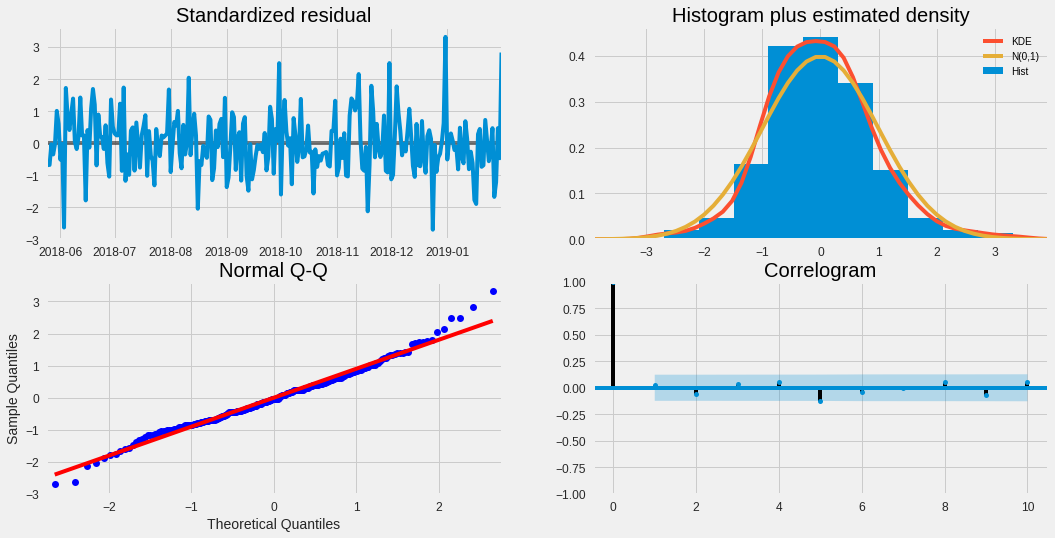

In [40]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [0]:
start_index = '2019-01-28'
end_index = '2019-02-23'
forecast = results.predict(start=start_index, end=end_index)

In [42]:
forecast=forecast.to_frame(name=None)
forecast=forecast.rename(columns = {0:'Quantity_predicated'})
forecast.head()

,Quantity_predicated
2019-01-28,56665.312814
2019-01-29,49196.990070
2019-01-30,51298.079212
2019-01-31,40467.782778
2019-02-01,53163.753404


In [0]:
index = pd.date_range(start="2019-01-28", end="2019-02-23")
forecast['Stime']=index
forecast.set_index('Stime', inplace=True)

In [44]:
forecast.head()

,Quantity_predicated
Stime,
2019-01-28,56665.312814
2019-01-29,49196.990070
2019-01-30,51298.079212
2019-01-31,40467.782778
2019-02-01,53163.753404


In [0]:
start_index = '2018-04-01'
end_index = '2019-01-31'
forecast_test_all = results.predict(start=start_index, end=end_index)

In [0]:
forecast_test_all=forecast_test_all.to_frame(name=None)

In [0]:

forecast_test_all=forecast_test_all.rename(columns = {0:'Quantity_predicated'})
index = pd.date_range(start="2018-04-01", end="2019-01-31")
forecast_test_all['Stime']=index
forecast_test_all.set_index('Stime', inplace=True)

In [48]:
forecast_test_all.tail()

,Quantity_predicated
Stime,
2019-01-27,49850.650546
2019-01-28,56665.312814
2019-01-29,49196.990070
2019-01-30,51298.079212
2019-01-31,40467.782778


Predict all test set errors

In [0]:
forecast_test_all_error = paneer['Quantity']-forecast_test_all['Quantity_predicated']

In [50]:
mean_forecast_test_all_error = np.mean(forecast_test_all_error)
print(mean_forecast_test_all_error)

1279.4957619495035


In [51]:
mean_absolute_test_all_error = np.mean( np.abs(forecast_test_all_error) )
print(mean_absolute_test_all_error)

5473.72916346933


In [52]:
mean_squared_test_all_error = np.mean(forecast_test_all_error*forecast_test_all_error)
print(mean_squared_test_all_error)

65249460.21002225


In [53]:
rmse_test_all = np.sqrt(mean_squared_test_all_error)
print(rmse_test_all)

8077.713798471833


In [0]:
def mean_absolute_percentage_test_all_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
MAPE= mean_absolute_percentage_test_all_error(paneer['Quantity'],forecast_test_all['Quantity_predicated'])
MAPE

13.902897313956208

In [0]:
pjme_all_test=pd.merge(paneer,forecast_test_all, left_index=True, right_index=True)

In [57]:
MAPE= mean_absolute_percentage_test_all_error(pjme_all_test['Quantity'],pjme_all_test['Quantity_predicated'])
MAPE

13.902897313956208

In [0]:
pjme_overall=pd.concat([pjme_all_test,forecast])


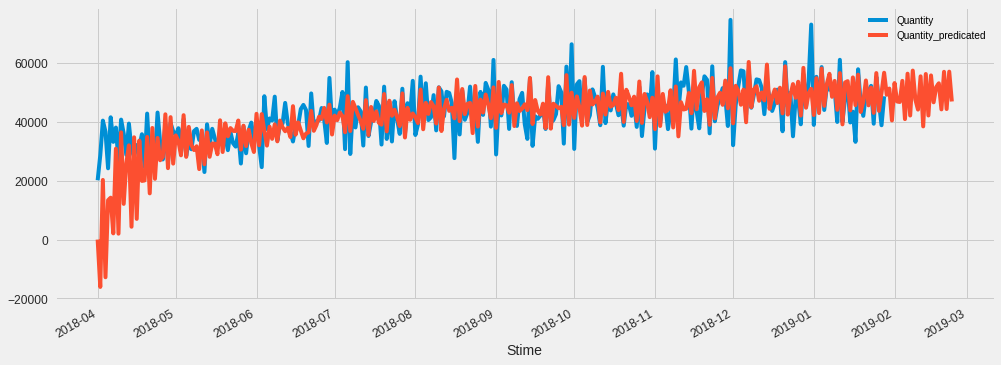

In [59]:
pjme_overall.plot(figsize=(15, 6))
plt.show()

In [55]:
r = s = range(0,5)
e=range(0,1)
res = list(itertools.product(r, e, s))
seasonal_res = [(x[0], x[1], x[2], 12) for x in list(itertools.product(r, e, s))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(res[1], seasonal_res[1]))
print('SARIMAX: {} x {}'.format(res[1], seasonal_res[2]))
print('SARIMAX: {} x {}'.format(res[2], seasonal_res[3]))
print('SARIMAX: {} x {}'.format(res[2], seasonal_res[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 0, 4, 12)


In [56]:
for param in res:
    for param_seasonal in seasonal_res:
        try:
            model = sm.tsa.statespace.SARIMAX(X_train,
                                            order=param,
                                          
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results_train = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_train.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5137.063948415878
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4729.47719472604
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:4432.32226015816
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:4149.062657723183


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 4, 12)12 - AIC:3990.1390273716006
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4245.571096328249
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4206.0122544850865
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:3946.5824882238358
ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:3698.501570301015
ARIMA(0, 0, 0)x(1, 0, 4, 12)12 - AIC:3445.3467112308754
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:3968.509822046806
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:3968.335751658858
ARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:3947.9664827926113
ARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:3691.9879837356566
ARIMA(0, 0, 0)x(2, 0, 4, 12)12 - AIC:3439.2429578143337
ARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:3723.0980227559157


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:3719.109007507607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:3713.718380734841


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:3694.3635266894653


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(3, 0, 4, 12)12 - AIC:3441.2599604248717
ARIMA(0, 0, 0)x(4, 0, 0, 12)12 - AIC:3472.6505980245997
ARIMA(0, 0, 0)x(4, 0, 1, 12)12 - AIC:3468.6872803297247


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(4, 0, 2, 12)12 - AIC:3457.8650922827865


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(4, 0, 3, 12)12 - AIC:3459.2235304072638


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(4, 0, 4, 12)12 - AIC:3440.984063595559
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4991.331483455603
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4669.080884004366
ARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:4378.783684914993
ARIMA(0, 0, 1)x(0, 0, 3, 12)12 - AIC:4097.570327117302


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 4, 12)12 - AIC:4893.790713768307
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4683.04024774333
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4637.488602876698
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:4361.345673597274
ARIMA(0, 0, 1)x(1, 0, 3, 12)12 - AIC:4085.3176974263297
ARIMA(0, 0, 1)x(1, 0, 4, 12)12 - AIC:3809.0831253260703
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:4405.609683265288
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:4407.572382868823
ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:4363.266680522803
ARIMA(0, 0, 1)x(2, 0, 3, 12)12 - AIC:4087.0697030005867
ARIMA(0, 0, 1)x(2, 0, 4, 12)12 - AIC:3811.082101466299
ARIMA(0, 0, 1)x(3, 0, 0, 12)12 - AIC:4129.879778193232
ARIMA(0, 0, 1)x(3, 0, 1, 12)12 - AIC:4131.776030074541
ARIMA(0, 0, 1)x(3, 0, 2, 12)12 - AIC:4133.776104502717


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(3, 0, 3, 12)12 - AIC:4088.8373761631174
ARIMA(0, 0, 1)x(3, 0, 4, 12)12 - AIC:3813.0748522682534
ARIMA(0, 0, 1)x(4, 0, 0, 12)12 - AIC:3854.1643589892965
ARIMA(0, 0, 1)x(4, 0, 1, 12)12 - AIC:3856.07211679014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(4, 0, 2, 12)12 - AIC:3857.6526895288607


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(4, 0, 3, 12)12 - AIC:3859.449710929638
ARIMA(0, 0, 1)x(4, 0, 4, 12)12 - AIC:3815.148377385428
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:4927.018878518133
ARIMA(0, 0, 2)x(0, 0, 1, 12)12 - AIC:4646.456342813643
ARIMA(0, 0, 2)x(0, 0, 2, 12)12 - AIC:4352.762416557605
ARIMA(0, 0, 2)x(0, 0, 3, 12)12 - AIC:4073.4128068364216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(0, 0, 4, 12)12 - AIC:4730.516329449945
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:4685.115018438344
ARIMA(0, 0, 2)x(1, 0, 1, 12)12 - AIC:4616.322032995864
ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:4339.869478624171
ARIMA(0, 0, 2)x(1, 0, 3, 12)12 - AIC:4063.822811899624
ARIMA(0, 0, 2)x(1, 0, 4, 12)12 - AIC:3787.8095383497202
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:4407.4152350559925
ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:4409.273752269005
ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:4341.813912438942


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(2, 0, 3, 12)12 - AIC:4065.799270069945
ARIMA(0, 0, 2)x(2, 0, 4, 12)12 - AIC:3789.7952072726325
ARIMA(0, 0, 2)x(3, 0, 0, 12)12 - AIC:4131.475952652021
ARIMA(0, 0, 2)x(3, 0, 1, 12)12 - AIC:4133.363457539624


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(3, 0, 2, 12)12 - AIC:4135.348698393448


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(3, 0, 3, 12)12 - AIC:4067.546240865741


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(3, 0, 4, 12)12 - AIC:3791.7918960353263
ARIMA(0, 0, 2)x(4, 0, 0, 12)12 - AIC:3855.748551278316
ARIMA(0, 0, 2)x(4, 0, 1, 12)12 - AIC:3857.6729239180377


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(4, 0, 2, 12)12 - AIC:3859.29228618851


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(4, 0, 3, 12)12 - AIC:3861.1793472861673


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x(4, 0, 4, 12)12 - AIC:3793.8129076780187
ARIMA(0, 0, 3)x(0, 0, 0, 12)12 - AIC:4897.261188672688
ARIMA(0, 0, 3)x(0, 0, 1, 12)12 - AIC:4609.948739796993
ARIMA(0, 0, 3)x(0, 0, 2, 12)12 - AIC:4329.232333740388
ARIMA(0, 0, 3)x(0, 0, 3, 12)12 - AIC:4050.6236934407816


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(0, 0, 4, 12)12 - AIC:4650.352566396856
ARIMA(0, 0, 3)x(1, 0, 0, 12)12 - AIC:4688.774598050834
ARIMA(0, 0, 3)x(1, 0, 1, 12)12 - AIC:4596.937656903871
ARIMA(0, 0, 3)x(1, 0, 2, 12)12 - AIC:4320.514708919929
ARIMA(0, 0, 3)x(1, 0, 3, 12)12 - AIC:4044.353469280808
ARIMA(0, 0, 3)x(1, 0, 4, 12)12 - AIC:3768.2663442905223
ARIMA(0, 0, 3)x(2, 0, 0, 12)12 - AIC:4411.233020174839
ARIMA(0, 0, 3)x(2, 0, 1, 12)12 - AIC:4413.061136379714
ARIMA(0, 0, 3)x(2, 0, 2, 12)12 - AIC:4322.471614867351


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(2, 0, 3, 12)12 - AIC:4046.379261148318
ARIMA(0, 0, 3)x(2, 0, 4, 12)12 - AIC:3770.2523442875863
ARIMA(0, 0, 3)x(3, 0, 0, 12)12 - AIC:4135.175973373149
ARIMA(0, 0, 3)x(3, 0, 1, 12)12 - AIC:4137.050818055039
ARIMA(0, 0, 3)x(3, 0, 2, 12)12 - AIC:4139.048797200839


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(3, 0, 3, 12)12 - AIC:4048.097439428367


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(3, 0, 4, 12)12 - AIC:3772.244108044748
ARIMA(0, 0, 3)x(4, 0, 0, 12)12 - AIC:3859.307574085038
ARIMA(0, 0, 3)x(4, 0, 1, 12)12 - AIC:3861.2256210862615


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(4, 0, 2, 12)12 - AIC:3863.029334820447
ARIMA(0, 0, 3)x(4, 0, 3, 12)12 - AIC:3865.251157551482


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 3)x(4, 0, 4, 12)12 - AIC:3774.2645677488545
ARIMA(0, 0, 4)x(0, 0, 0, 12)12 - AIC:4868.322460804453
ARIMA(0, 0, 4)x(0, 0, 1, 12)12 - AIC:4585.228213465163
ARIMA(0, 0, 4)x(0, 0, 2, 12)12 - AIC:4306.020550516565
ARIMA(0, 0, 4)x(0, 0, 3, 12)12 - AIC:4027.8408492175445


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(0, 0, 4, 12)12 - AIC:4613.573917629816
ARIMA(0, 0, 4)x(1, 0, 0, 12)12 - AIC:4692.404597385994
ARIMA(0, 0, 4)x(1, 0, 1, 12)12 - AIC:4577.318850564905
ARIMA(0, 0, 4)x(1, 0, 2, 12)12 - AIC:4300.789886316499
ARIMA(0, 0, 4)x(1, 0, 3, 12)12 - AIC:4024.6217049533066
ARIMA(0, 0, 4)x(1, 0, 4, 12)12 - AIC:3748.479231566035
ARIMA(0, 0, 4)x(2, 0, 0, 12)12 - AIC:4414.780606853762
ARIMA(0, 0, 4)x(2, 0, 1, 12)12 - AIC:4416.582373429861


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(2, 0, 2, 12)12 - AIC:4302.75867733667
ARIMA(0, 0, 4)x(2, 0, 3, 12)12 - AIC:4026.6589477423977


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(2, 0, 4, 12)12 - AIC:3750.4636063365656
ARIMA(0, 0, 4)x(3, 0, 0, 12)12 - AIC:4138.624423617886
ARIMA(0, 0, 4)x(3, 0, 1, 12)12 - AIC:4140.492471682419
ARIMA(0, 0, 4)x(3, 0, 2, 12)12 - AIC:4142.488205035613


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(3, 0, 3, 12)12 - AIC:4028.408485276401


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(3, 0, 4, 12)12 - AIC:3752.5270135541405


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(4, 0, 0, 12)12 - AIC:3783.840287278559


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(4, 0, 1, 12)12 - AIC:3864.5905569217125


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(4, 0, 2, 12)12 - AIC:3866.367460159274


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(4, 0, 3, 12)12 - AIC:3868.2639328631594


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 4)x(4, 0, 4, 12)12 - AIC:3754.4725185536154
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:4585.128933261232
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:4313.13779119206
ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:4056.6968730547887
ARIMA(1, 0, 0)x(0, 0, 3, 12)12 - AIC:3794.6821234809763
ARIMA(1, 0, 0)x(0, 0, 4, 12)12 - AIC:3545.620676419464
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:4238.179572873671
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:4228.346103408055
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:3969.2730554551786
ARIMA(1, 0, 0)x(1, 0, 3, 12)12 - AIC:3715.9659908924477
ARIMA(1, 0, 0)x(1, 0, 4, 12)12 - AIC:3460.259231036689
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:3967.2646216383555
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:4042.9598213506674
ARIMA(1, 0, 0)x(2, 0, 2, 12)12 - AIC:4013.3871039774745
ARIMA(1, 0, 0)x(2, 0, 3, 12)12 - AIC:3760.1681441304863
ARIMA(1, 0, 0)x(2, 0, 4, 12)12 - AIC:3462.1494845352845
ARIMA(1, 0, 0)x(3, 0, 0, 12)12 - AIC:3784.7052709117906
ARIMA(1, 0, 0)x(3, 0, 1, 12)12 - AIC:3776.8778182657325

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(4, 0, 4, 12)12 - AIC:3508.1523460507724
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:4375.010266079671
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:4115.975174109804
ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:3867.945063037768


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 3, 12)12 - AIC:3618.1826818131362


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 4, 12)12 - AIC:3704.1107368332114
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:4224.618981408253
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:4171.565012531526
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:3866.002631432476
ARIMA(1, 0, 1)x(1, 0, 3, 12)12 - AIC:3617.949954440269


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 4, 12)12 - AIC:3384.5605270276264
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:3888.2453509230895
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:3883.7623362209147


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:3862.9745024518897
ARIMA(1, 0, 1)x(2, 0, 3, 12)12 - AIC:3646.459843054096


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(2, 0, 4, 12)12 - AIC:3380.77062035199
ARIMA(1, 0, 1)x(3, 0, 0, 12)12 - AIC:3640.925930613641


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(3, 0, 1, 12)12 - AIC:3638.528974430163


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(3, 0, 2, 12)12 - AIC:3639.7776715672867


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(3, 0, 3, 12)12 - AIC:3621.294995928543


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(3, 0, 4, 12)12 - AIC:3374.718807241519
ARIMA(1, 0, 1)x(4, 0, 0, 12)12 - AIC:3399.5628883659074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(4, 0, 1, 12)12 - AIC:3393.712132695495


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(4, 0, 2, 12)12 - AIC:3396.405237945807


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(4, 0, 3, 12)12 - AIC:3392.9949325971606


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(4, 0, 4, 12)12 - AIC:3374.127630985935
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:4294.875738365439
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:4043.6340608519295
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:3806.0396656850544
ARIMA(1, 0, 2)x(0, 0, 3, 12)12 - AIC:3562.5767944864456


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(0, 0, 4, 12)12 - AIC:3333.141117536176
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:4083.6351060186253
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:4045.2344581859384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:3806.4371606499344
ARIMA(1, 0, 2)x(1, 0, 3, 12)12 - AIC:3588.9739513987115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 4, 12)12 - AIC:3341.332865102063
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:3845.7717168505746
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:3845.7273318525085
ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:3805.5371880513267


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 3, 12)12 - AIC:3565.333038045339


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 4, 12)12 - AIC:3330.9828621534343
ARIMA(1, 0, 2)x(3, 0, 0, 12)12 - AIC:3606.582450214125
ARIMA(1, 0, 2)x(3, 0, 1, 12)12 - AIC:3603.8991668611598


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(3, 0, 2, 12)12 - AIC:3606.0409023638044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(3, 0, 3, 12)12 - AIC:3565.024826175387


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(3, 0, 4, 12)12 - AIC:3332.3126602357215
ARIMA(1, 0, 2)x(4, 0, 0, 12)12 - AIC:3362.162160907358


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(4, 0, 1, 12)12 - AIC:3364.0820499551346


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(4, 0, 2, 12)12 - AIC:3361.6448757234684


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(4, 0, 3, 12)12 - AIC:3373.0934731221987


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(4, 0, 4, 12)12 - AIC:3336.4117505118625
ARIMA(1, 0, 3)x(0, 0, 0, 12)12 - AIC:4286.114601899173
ARIMA(1, 0, 3)x(0, 0, 1, 12)12 - AIC:4043.24206279267
ARIMA(1, 0, 3)x(0, 0, 2, 12)12 - AIC:3803.360853486616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(0, 0, 3, 12)12 - AIC:3561.1400921919317
ARIMA(1, 0, 3)x(0, 0, 4, 12)12 - AIC:3322.3794293277488
ARIMA(1, 0, 3)x(1, 0, 0, 12)12 - AIC:4214.497539511347
ARIMA(1, 0, 3)x(1, 0, 1, 12)12 - AIC:4079.7167037692693


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(1, 0, 2, 12)12 - AIC:3804.6027086374716


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(1, 0, 3, 12)12 - AIC:3563.7192007800077


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(1, 0, 4, 12)12 - AIC:3336.6585332903296
ARIMA(1, 0, 3)x(2, 0, 0, 12)12 - AIC:3930.688233793313


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 0, 1, 12)12 - AIC:3865.661980502211


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 0, 2, 12)12 - AIC:3806.5573538385206


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 0, 3, 12)12 - AIC:3565.9820777976875


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(2, 0, 4, 12)12 - AIC:3327.9436784131585


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(3, 0, 0, 12)12 - AIC:3623.739848741244
ARIMA(1, 0, 3)x(3, 0, 1, 12)12 - AIC:3624.024337831109
ARIMA(1, 0, 3)x(3, 0, 2, 12)12 - AIC:3626.0287163713465


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(3, 0, 3, 12)12 - AIC:3587.1333691734076


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(3, 0, 4, 12)12 - AIC:3331.4365533190185


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(4, 0, 0, 12)12 - AIC:3380.7126300272935


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(4, 0, 1, 12)12 - AIC:3384.1512343472905


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(4, 0, 2, 12)12 - AIC:3384.063129142328


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x(4, 0, 3, 12)12 - AIC:3389.239377839958
ARIMA(1, 0, 3)x(4, 0, 4, 12)12 - AIC:3332.575311938018


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(0, 0, 0, 12)12 - AIC:4284.416251020395


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(0, 0, 1, 12)12 - AIC:4040.3673096699295


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(0, 0, 2, 12)12 - AIC:3799.1066414799425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(0, 0, 3, 12)12 - AIC:3555.848581239311


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(0, 0, 4, 12)12 - AIC:3336.924366185518
ARIMA(1, 0, 4)x(1, 0, 0, 12)12 - AIC:4210.257761238035
ARIMA(1, 0, 4)x(1, 0, 1, 12)12 - AIC:4072.6882096298295


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(1, 0, 2, 12)12 - AIC:3800.686007379717


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(1, 0, 3, 12)12 - AIC:3558.4032232119234


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(1, 0, 4, 12)12 - AIC:3319.1372009604784


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 0, 0, 12)12 - AIC:3879.933238123701


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 0, 1, 12)12 - AIC:3882.1506618597305


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 0, 2, 12)12 - AIC:3802.734068386322


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 0, 3, 12)12 - AIC:3559.5936153326084


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(2, 0, 4, 12)12 - AIC:3320.813767015022


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(3, 0, 0, 12)12 - AIC:3638.8576295640682


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(3, 0, 1, 12)12 - AIC:3638.6598970153145


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(3, 0, 2, 12)12 - AIC:3640.673438195162


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(3, 0, 3, 12)12 - AIC:3561.160049907174


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(3, 0, 4, 12)12 - AIC:3320.2090403124894


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(4, 0, 0, 12)12 - AIC:3394.5439489837263


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(4, 0, 1, 12)12 - AIC:3396.6073151662217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(4, 0, 2, 12)12 - AIC:3398.5212951256644


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(4, 0, 3, 12)12 - AIC:3400.9144563556433


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x(4, 0, 4, 12)12 - AIC:3326.621382883512
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:4406.866579787695
ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:4174.950378810172
ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:3932.2777200093255
ARIMA(2, 0, 0)x(0, 0, 3, 12)12 - AIC:3677.877119018547
ARIMA(2, 0, 0)x(0, 0, 4, 12)12 - AIC:3435.0933709232477
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:4155.257209762024
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:4148.280602285431
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:3924.805077209074
ARIMA(2, 0, 0)x(1, 0, 3, 12)12 - AIC:3678.357980212899
ARIMA(2, 0, 0)x(1, 0, 4, 12)12 - AIC:3434.707710563638
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:3910.8048086981826
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:3903.5467292033327
ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:3905.621504576704
ARIMA(2, 0, 0)x(2, 0, 3, 12)12 - AIC:3668.053321838985
ARIMA(2, 0, 0)x(2, 0, 4, 12)12 - AIC:3436.455546381816
ARIMA(2, 0, 0)x(3, 0, 0, 12)12 - AIC:3661.609464360911
ARIMA(2, 0, 0)x(3, 0, 1, 12)12 - AIC:3653.608510226878
ARIMA(

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(3, 0, 4, 12)12 - AIC:3419.1811795491585
ARIMA(2, 0, 0)x(4, 0, 0, 12)12 - AIC:3408.002359147445
ARIMA(2, 0, 0)x(4, 0, 1, 12)12 - AIC:3414.644052228332
ARIMA(2, 0, 0)x(4, 0, 2, 12)12 - AIC:3398.934373485854


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(4, 0, 3, 12)12 - AIC:3402.4221809372857


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(4, 0, 4, 12)12 - AIC:3389.3631688323485
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:4342.445017643809
ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:4061.124007657413
ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:3823.339599897562
ARIMA(2, 0, 1)x(0, 0, 3, 12)12 - AIC:3583.7784476213383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 0, 4, 12)12 - AIC:3345.8777468715234
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:4208.97256562385
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:4062.954956234262
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:3823.493303317893


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 3, 12)12 - AIC:3584.3590445523955


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 4, 12)12 - AIC:3348.436355988846
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:3823.3171516274756


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:3823.5591421043246
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:3825.4963975207515
ARIMA(2, 0, 1)x(2, 0, 3, 12)12 - AIC:3585.99148476017


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 4, 12)12 - AIC:3349.6833567294047
ARIMA(2, 0, 1)x(3, 0, 0, 12)12 - AIC:3594.4913529345376


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(3, 0, 1, 12)12 - AIC:3585.9375558637394
ARIMA(2, 0, 1)x(3, 0, 2, 12)12 - AIC:3587.442518554042
ARIMA(2, 0, 1)x(3, 0, 3, 12)12 - AIC:3587.6807102555576


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(3, 0, 4, 12)12 - AIC:3354.3774474735856


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(4, 0, 0, 12)12 - AIC:3354.672984312302
ARIMA(2, 0, 1)x(4, 0, 1, 12)12 - AIC:3346.30495178172


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(4, 0, 2, 12)12 - AIC:3346.5504404179496


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(4, 0, 3, 12)12 - AIC:3349.0162358263146


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(4, 0, 4, 12)12 - AIC:3353.4568398376946
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:4294.939522422801
ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:4036.6699370115684
ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:3800.552374776113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:3559.7068775095922


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 4, 12)12 - AIC:3328.4853157804064
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:4206.309666363525
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:4089.731061601002
ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:3800.8227758695675


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:3562.054562956485


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 4, 12)12 - AIC:3326.349204080643
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:3819.916126158824


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:3820.054133886587


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:3802.7389662538108


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:3562.8182816958824


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 4, 12)12 - AIC:3328.6794528603677
ARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:3583.943494843202


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:3584.0947903705055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:3585.3621002481204


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:3565.388192472096


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(3, 0, 4, 12)12 - AIC:3333.2644804803567


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(4, 0, 0, 12)12 - AIC:3342.4485216872217


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(4, 0, 1, 12)12 - AIC:3343.5925009689345


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(4, 0, 2, 12)12 - AIC:3346.7051794341687


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(4, 0, 3, 12)12 - AIC:3350.4368741480903


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(4, 0, 4, 12)12 - AIC:3331.9476595642254
ARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:4260.912439226908


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:4020.9474696882125
ARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:3789.090195679878


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:3543.0127777389334


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(0, 0, 4, 12)12 - AIC:3307.3147929315187
ARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:4060.3194956905118
ARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:4022.9092381420414


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC:3787.0354952570615


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 0, 3, 12)12 - AIC:3544.176632600984


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(1, 0, 4, 12)12 - AIC:3308.4114672033675
ARIMA(2, 0, 3)x(2, 0, 0, 12)12 - AIC:3828.1557801201498


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(2, 0, 1, 12)12 - AIC:3827.2662026179946


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(2, 0, 2, 12)12 - AIC:3790.807988180971


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(2, 0, 3, 12)12 - AIC:3546.2465936283143


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(2, 0, 4, 12)12 - AIC:3310.6620601593304
ARIMA(2, 0, 3)x(3, 0, 0, 12)12 - AIC:3587.745295812995


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(3, 0, 1, 12)12 - AIC:3586.5169095636847


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(3, 0, 2, 12)12 - AIC:3588.117714906788


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(3, 0, 3, 12)12 - AIC:3548.5120771753154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(3, 0, 4, 12)12 - AIC:3314.548232657556


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(4, 0, 0, 12)12 - AIC:3342.6918002122693


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(4, 0, 1, 12)12 - AIC:3348.8970416529037


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(4, 0, 2, 12)12 - AIC:3349.2967961611585


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(4, 0, 3, 12)12 - AIC:3351.095669002622


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 3)x(4, 0, 4, 12)12 - AIC:3313.514743622198
ARIMA(2, 0, 4)x(0, 0, 0, 12)12 - AIC:4242.3994007377005


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(0, 0, 1, 12)12 - AIC:4005.5356885683263


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(0, 0, 2, 12)12 - AIC:3767.21238000374


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(0, 0, 3, 12)12 - AIC:3526.9570117595167


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(0, 0, 4, 12)12 - AIC:3490.855257500997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 0, 0, 12)12 - AIC:4181.10756683979


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 0, 1, 12)12 - AIC:4007.3748208359098


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 0, 2, 12)12 - AIC:3768.261032735154


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 0, 3, 12)12 - AIC:3525.9049381520845


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(1, 0, 4, 12)12 - AIC:3287.684638109159


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(2, 0, 0, 12)12 - AIC:3826.300666620099


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(2, 0, 1, 12)12 - AIC:3827.0416409761956


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(2, 0, 2, 12)12 - AIC:3770.3580857190727
ARIMA(2, 0, 4)x(2, 0, 3, 12)12 - AIC:3526.595700839755


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(2, 0, 4, 12)12 - AIC:3288.190011614467


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(3, 0, 0, 12)12 - AIC:3589.5878425862697


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(3, 0, 1, 12)12 - AIC:3588.2724676907324


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(3, 0, 2, 12)12 - AIC:3588.818181522788


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(3, 0, 3, 12)12 - AIC:3528.134294040649


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(3, 0, 4, 12)12 - AIC:3295.9006908361766


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(4, 0, 0, 12)12 - AIC:3348.306174166741


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(4, 0, 1, 12)12 - AIC:3346.921552092997


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(4, 0, 2, 12)12 - AIC:3349.9827458866876


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(4, 0, 3, 12)12 - AIC:3351.216760707852


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 4)x(4, 0, 4, 12)12 - AIC:3294.575573912839
ARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:4329.972726634745
ARIMA(3, 0, 0)x(0, 0, 1, 12)12 - AIC:4122.526750303448
ARIMA(3, 0, 0)x(0, 0, 2, 12)12 - AIC:3883.163933141663
ARIMA(3, 0, 0)x(0, 0, 3, 12)12 - AIC:3644.265513190029
ARIMA(3, 0, 0)x(0, 0, 4, 12)12 - AIC:3402.656564413612
ARIMA(3, 0, 0)x(1, 0, 0, 12)12 - AIC:4083.1136221526995
ARIMA(3, 0, 0)x(1, 0, 1, 12)12 - AIC:4083.9117540143625
ARIMA(3, 0, 0)x(1, 0, 2, 12)12 - AIC:3884.175644157079
ARIMA(3, 0, 0)x(1, 0, 3, 12)12 - AIC:3642.110497175332
ARIMA(3, 0, 0)x(1, 0, 4, 12)12 - AIC:3398.337509137649
ARIMA(3, 0, 0)x(2, 0, 0, 12)12 - AIC:3842.189997002099
ARIMA(3, 0, 0)x(2, 0, 1, 12)12 - AIC:3843.666150896469
ARIMA(3, 0, 0)x(2, 0, 2, 12)12 - AIC:3841.7609928611782
ARIMA(3, 0, 0)x(2, 0, 3, 12)12 - AIC:3643.3804815042063


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(2, 0, 4, 12)12 - AIC:3399.908805907437
ARIMA(3, 0, 0)x(3, 0, 0, 12)12 - AIC:3602.872444318996
ARIMA(3, 0, 0)x(3, 0, 1, 12)12 - AIC:3601.0782322325713
ARIMA(3, 0, 0)x(3, 0, 2, 12)12 - AIC:3601.811710562676


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(3, 0, 3, 12)12 - AIC:3599.1518427666133


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(3, 0, 4, 12)12 - AIC:3396.1580817832855
ARIMA(3, 0, 0)x(4, 0, 0, 12)12 - AIC:3360.0154847156477
ARIMA(3, 0, 0)x(4, 0, 1, 12)12 - AIC:3358.886212524434


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(4, 0, 2, 12)12 - AIC:3360.1095069159096


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(4, 0, 3, 12)12 - AIC:3362.935529106271


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 0)x(4, 0, 4, 12)12 - AIC:3352.216636764242
ARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:4306.091346811963
ARIMA(3, 0, 1)x(0, 0, 1, 12)12 - AIC:4061.896736989689
ARIMA(3, 0, 1)x(0, 0, 2, 12)12 - AIC:3824.3308823932425


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(0, 0, 3, 12)12 - AIC:3585.4802373954385


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(0, 0, 4, 12)12 - AIC:3369.6289256171312
ARIMA(3, 0, 1)x(1, 0, 0, 12)12 - AIC:4042.342038285683


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(1, 0, 1, 12)12 - AIC:4043.9124956759865


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(1, 0, 2, 12)12 - AIC:3825.019341182752


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(1, 0, 3, 12)12 - AIC:3585.6807284026763


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(1, 0, 4, 12)12 - AIC:3348.3730007447602
ARIMA(3, 0, 1)x(2, 0, 0, 12)12 - AIC:3804.7570951689886


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(2, 0, 1, 12)12 - AIC:3805.424720818728


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(2, 0, 2, 12)12 - AIC:3807.537117821056
ARIMA(3, 0, 1)x(2, 0, 3, 12)12 - AIC:3587.557511040003


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(2, 0, 4, 12)12 - AIC:3350.764713797288


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(3, 0, 0, 12)12 - AIC:3565.7657120055555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(3, 0, 1, 12)12 - AIC:3566.076511122851


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(3, 0, 2, 12)12 - AIC:3567.7928327526693


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(3, 0, 3, 12)12 - AIC:3570.328978718565


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(3, 0, 4, 12)12 - AIC:3355.0518691185525


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(4, 0, 0, 12)12 - AIC:3326.3337202609046


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(4, 0, 1, 12)12 - AIC:3328.210329114356


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(4, 0, 2, 12)12 - AIC:3330.96355187381


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(4, 0, 3, 12)12 - AIC:3333.584189904337


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 1)x(4, 0, 4, 12)12 - AIC:3336.232700799425
ARIMA(3, 0, 2)x(0, 0, 0, 12)12 - AIC:4281.415801419187
ARIMA(3, 0, 2)x(0, 0, 1, 12)12 - AIC:4038.6587986684603
ARIMA(3, 0, 2)x(0, 0, 2, 12)12 - AIC:3802.5065295235213


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(0, 0, 3, 12)12 - AIC:3561.699347662113


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(0, 0, 4, 12)12 - AIC:3555.8096179024105
ARIMA(3, 0, 2)x(1, 0, 0, 12)12 - AIC:4185.072244648588


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 0, 1, 12)12 - AIC:4050.789732864805


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 0, 2, 12)12 - AIC:3802.7791769906207


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 0, 3, 12)12 - AIC:3562.206240717308


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(1, 0, 4, 12)12 - AIC:3326.306483533791
ARIMA(3, 0, 2)x(2, 0, 0, 12)12 - AIC:3802.5355940715003


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(2, 0, 1, 12)12 - AIC:3803.0205197035452


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(2, 0, 2, 12)12 - AIC:3804.753573812236


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(2, 0, 3, 12)12 - AIC:3564.3955114671708


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(2, 0, 4, 12)12 - AIC:3329.5829740145705
ARIMA(3, 0, 2)x(3, 0, 0, 12)12 - AIC:3564.213929169295


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(3, 0, 1, 12)12 - AIC:3565.3091678250703
ARIMA(3, 0, 2)x(3, 0, 2, 12)12 - AIC:3565.4193511732133


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(3, 0, 3, 12)12 - AIC:3567.2541934684077


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(3, 0, 4, 12)12 - AIC:3334.335569470395


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(4, 0, 0, 12)12 - AIC:3325.300304714286
ARIMA(3, 0, 2)x(4, 0, 1, 12)12 - AIC:3325.3142611613794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(4, 0, 2, 12)12 - AIC:3329.1047543815794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(4, 0, 3, 12)12 - AIC:3332.1196210183225


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 2)x(4, 0, 4, 12)12 - AIC:3335.948628141529
ARIMA(3, 0, 3)x(0, 0, 0, 12)12 - AIC:4257.551794024576
ARIMA(3, 0, 3)x(0, 0, 1, 12)12 - AIC:4029.0981237536944


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(0, 0, 2, 12)12 - AIC:3782.6615008946196


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(0, 0, 3, 12)12 - AIC:3545.812471738852


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(0, 0, 4, 12)12 - AIC:3309.0040777367985
ARIMA(3, 0, 3)x(1, 0, 0, 12)12 - AIC:4051.866342746521


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 0, 1, 12)12 - AIC:4026.7193397045894


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 0, 2, 12)12 - AIC:3784.1753804461227


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 0, 3, 12)12 - AIC:3547.0558635989373


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(1, 0, 4, 12)12 - AIC:3308.735029639828


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 0, 0, 12)12 - AIC:3802.0700943078527


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 0, 1, 12)12 - AIC:3803.9212921138724


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 0, 2, 12)12 - AIC:3785.2556725090453


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 0, 3, 12)12 - AIC:3549.0032926006443


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(2, 0, 4, 12)12 - AIC:3308.5666770915896


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(3, 0, 0, 12)12 - AIC:3565.5029787447065


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(3, 0, 1, 12)12 - AIC:3567.1502847209986


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(3, 0, 2, 12)12 - AIC:3568.7608540427996


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(3, 0, 3, 12)12 - AIC:3534.69366076742


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(3, 0, 4, 12)12 - AIC:3315.9683059584786


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(4, 0, 0, 12)12 - AIC:3325.9653660372855


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(4, 0, 1, 12)12 - AIC:3327.144519438655


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(4, 0, 2, 12)12 - AIC:3330.6268471746407


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(4, 0, 3, 12)12 - AIC:3335.7849362015277


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 3)x(4, 0, 4, 12)12 - AIC:3315.5515260681623
ARIMA(3, 0, 4)x(0, 0, 0, 12)12 - AIC:4221.126664182133


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(0, 0, 1, 12)12 - AIC:3956.174462507998


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(0, 0, 2, 12)12 - AIC:3717.9224302340845


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(0, 0, 3, 12)12 - AIC:3489.889948569239


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(0, 0, 4, 12)12 - AIC:3453.6873247697267
ARIMA(3, 0, 4)x(1, 0, 0, 12)12 - AIC:3998.1266855179238


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(1, 0, 1, 12)12 - AIC:3958.2548216112573


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(1, 0, 2, 12)12 - AIC:3720.4696654047157


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(1, 0, 3, 12)12 - AIC:3487.313382529385


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(1, 0, 4, 12)12 - AIC:3252.723168063074


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 0, 0, 12)12 - AIC:3757.6992043038626


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 0, 1, 12)12 - AIC:3758.9734836317043


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 0, 2, 12)12 - AIC:3725.8837894169055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 0, 3, 12)12 - AIC:3488.8663624714227


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(2, 0, 4, 12)12 - AIC:3252.17422508274


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(3, 0, 0, 12)12 - AIC:3523.361357601261


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(3, 0, 1, 12)12 - AIC:3525.704451585922


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(3, 0, 2, 12)12 - AIC:3526.9994115713325


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(3, 0, 3, 12)12 - AIC:3489.003320629123


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(3, 0, 4, 12)12 - AIC:3256.6045832929713


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(4, 0, 0, 12)12 - AIC:3290.1957744221017


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(4, 0, 1, 12)12 - AIC:3291.5448310481324


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(4, 0, 2, 12)12 - AIC:3292.636799746057


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(4, 0, 3, 12)12 - AIC:3295.25557979787


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 0, 4)x(4, 0, 4, 12)12 - AIC:3259.364432813017
ARIMA(4, 0, 0)x(0, 0, 0, 12)12 - AIC:4289.505930974553
ARIMA(4, 0, 0)x(0, 0, 1, 12)12 - AIC:4112.056606973511
ARIMA(4, 0, 0)x(0, 0, 2, 12)12 - AIC:3873.5521801102495
ARIMA(4, 0, 0)x(0, 0, 3, 12)12 - AIC:3634.136293775579


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(0, 0, 4, 12)12 - AIC:3390.977261948077
ARIMA(4, 0, 0)x(1, 0, 0, 12)12 - AIC:4053.1009112977117
ARIMA(4, 0, 0)x(1, 0, 1, 12)12 - AIC:4052.7861319963567
ARIMA(4, 0, 0)x(1, 0, 2, 12)12 - AIC:3873.119854269823
ARIMA(4, 0, 0)x(1, 0, 3, 12)12 - AIC:3631.9472501878317
ARIMA(4, 0, 0)x(1, 0, 4, 12)12 - AIC:3386.7140392505707
ARIMA(4, 0, 0)x(2, 0, 0, 12)12 - AIC:3813.76415982843
ARIMA(4, 0, 0)x(2, 0, 1, 12)12 - AIC:3813.3496513647356
ARIMA(4, 0, 0)x(2, 0, 2, 12)12 - AIC:3811.953929634629


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(2, 0, 3, 12)12 - AIC:3633.503912539142


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(2, 0, 4, 12)12 - AIC:3388.696499897428
ARIMA(4, 0, 0)x(3, 0, 0, 12)12 - AIC:3570.8271262056087
ARIMA(4, 0, 0)x(3, 0, 1, 12)12 - AIC:3570.6688086669965


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(3, 0, 2, 12)12 - AIC:3571.4764360751433


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(3, 0, 3, 12)12 - AIC:3569.323671203784


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(3, 0, 4, 12)12 - AIC:3391.701025686906
ARIMA(4, 0, 0)x(4, 0, 0, 12)12 - AIC:3326.6391172195017
ARIMA(4, 0, 0)x(4, 0, 1, 12)12 - AIC:3326.522460398544


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(4, 0, 2, 12)12 - AIC:3325.386567666548


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(4, 0, 3, 12)12 - AIC:3315.9060352917368


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 0)x(4, 0, 4, 12)12 - AIC:3310.9676124851235
ARIMA(4, 0, 1)x(0, 0, 0, 12)12 - AIC:4270.9161898942975
ARIMA(4, 0, 1)x(0, 0, 1, 12)12 - AIC:4060.5453948605136
ARIMA(4, 0, 1)x(0, 0, 2, 12)12 - AIC:3823.463968511364


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(0, 0, 3, 12)12 - AIC:3584.9387844283747


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(0, 0, 4, 12)12 - AIC:3347.1071330757272
ARIMA(4, 0, 1)x(1, 0, 0, 12)12 - AIC:4021.6290973471882


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(1, 0, 1, 12)12 - AIC:4023.1676582309665
ARIMA(4, 0, 1)x(1, 0, 2, 12)12 - AIC:3823.950569814532


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(1, 0, 3, 12)12 - AIC:3584.557812964219


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(1, 0, 4, 12)12 - AIC:3347.2059131455435
ARIMA(4, 0, 1)x(2, 0, 0, 12)12 - AIC:3784.006647259688
ARIMA(4, 0, 1)x(2, 0, 1, 12)12 - AIC:3784.3974054112055


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(2, 0, 2, 12)12 - AIC:3786.6148842913235


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(2, 0, 3, 12)12 - AIC:3586.537525987994


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(2, 0, 4, 12)12 - AIC:3349.9789258340206


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(3, 0, 0, 12)12 - AIC:3545.0330665316465


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(3, 0, 1, 12)12 - AIC:3544.763858606605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(3, 0, 2, 12)12 - AIC:3546.9859990012383


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(3, 0, 3, 12)12 - AIC:3547.993072577243


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(3, 0, 4, 12)12 - AIC:3353.723188250686


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(4, 0, 0, 12)12 - AIC:3305.3787065249976


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(4, 0, 1, 12)12 - AIC:3307.702249882555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(4, 0, 2, 12)12 - AIC:3310.376170512799


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(4, 0, 3, 12)12 - AIC:3313.0964141273907


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 1)x(4, 0, 4, 12)12 - AIC:3315.7019048927014


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(0, 0, 0, 12)12 - AIC:4258.922126074825
ARIMA(4, 0, 2)x(0, 0, 1, 12)12 - AIC:4047.350930208765
ARIMA(4, 0, 2)x(0, 0, 2, 12)12 - AIC:3805.389215670835


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(0, 0, 3, 12)12 - AIC:3577.495538683285


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(0, 0, 4, 12)12 - AIC:3331.110042268704
ARIMA(4, 0, 2)x(1, 0, 0, 12)12 - AIC:4024.8835251344826


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(1, 0, 1, 12)12 - AIC:4029.3513932870264
ARIMA(4, 0, 2)x(1, 0, 2, 12)12 - AIC:3809.874964873851


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(1, 0, 3, 12)12 - AIC:3574.326951495233


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(1, 0, 4, 12)12 - AIC:3337.8712176441677
ARIMA(4, 0, 2)x(2, 0, 0, 12)12 - AIC:3786.945973280384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(2, 0, 1, 12)12 - AIC:3787.6881104938334


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(2, 0, 2, 12)12 - AIC:3790.6695267871673


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(2, 0, 3, 12)12 - AIC:3573.478890634913
ARIMA(4, 0, 2)x(2, 0, 4, 12)12 - AIC:3342.4415750484172
ARIMA(4, 0, 2)x(3, 0, 0, 12)12 - AIC:3548.7724549411005


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(3, 0, 1, 12)12 - AIC:3550.2537984668165
ARIMA(4, 0, 2)x(3, 0, 2, 12)12 - AIC:3551.827933854306
ARIMA(4, 0, 2)x(3, 0, 3, 12)12 - AIC:3557.430035339189
ARIMA(4, 0, 2)x(3, 0, 4, 12)12 - AIC:3335.1164393811237
ARIMA(4, 0, 2)x(4, 0, 0, 12)12 - AIC:3308.8448329846196
ARIMA(4, 0, 2)x(4, 0, 1, 12)12 - AIC:3314.186698614897


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(4, 0, 2, 12)12 - AIC:3311.5962892995117
ARIMA(4, 0, 2)x(4, 0, 3, 12)12 - AIC:3311.7165841429596


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 2)x(4, 0, 4, 12)12 - AIC:3320.4308004684935
ARIMA(4, 0, 3)x(0, 0, 0, 12)12 - AIC:4253.963093094861


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 0, 1, 12)12 - AIC:4013.540824911115


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 0, 2, 12)12 - AIC:3783.007068675378


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 0, 3, 12)12 - AIC:3546.957503794337


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(0, 0, 4, 12)12 - AIC:3521.58449009153


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 0, 0, 12)12 - AIC:4002.1109821266914


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 0, 1, 12)12 - AIC:4017.309982427908


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 0, 2, 12)12 - AIC:3739.995066425463


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 0, 3, 12)12 - AIC:3506.174970216924


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(1, 0, 4, 12)12 - AIC:3305.0170552588834


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 0, 0, 12)12 - AIC:3782.7815459714698


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 0, 1, 12)12 - AIC:3739.5526353153887


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 0, 2, 12)12 - AIC:3740.991304798579


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 0, 3, 12)12 - AIC:3506.7647729034


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(2, 0, 4, 12)12 - AIC:3301.8590916592666


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(3, 0, 0, 12)12 - AIC:3546.862691106665


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(3, 0, 1, 12)12 - AIC:3547.188215987675


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(3, 0, 2, 12)12 - AIC:3548.945276569002


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(3, 0, 3, 12)12 - AIC:3508.5277612831264


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(3, 0, 4, 12)12 - AIC:3311.120009607189


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(4, 0, 0, 12)12 - AIC:3307.6232670232857


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(4, 0, 1, 12)12 - AIC:3304.446061359852


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(4, 0, 2, 12)12 - AIC:3306.045572059562


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(4, 0, 3, 12)12 - AIC:3275.0191319743126


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 3)x(4, 0, 4, 12)12 - AIC:3312.827959223397
ARIMA(4, 0, 4)x(0, 0, 0, 12)12 - AIC:4216.914837270702


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 0, 1, 12)12 - AIC:3955.9388019338817


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 0, 2, 12)12 - AIC:3719.3464622197553


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 0, 3, 12)12 - AIC:3492.2049756356078


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(0, 0, 4, 12)12 - AIC:3467.072353700432


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 0, 0, 12)12 - AIC:3975.881732821384


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 0, 1, 12)12 - AIC:3958.746186357272


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 0, 2, 12)12 - AIC:3721.15261919578


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 0, 3, 12)12 - AIC:3487.9086227446815


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(1, 0, 4, 12)12 - AIC:3253.515929216908


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 0, 0, 12)12 - AIC:3739.6969551917628


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 0, 1, 12)12 - AIC:3739.940641742659


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 0, 2, 12)12 - AIC:3722.835218546348


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 0, 3, 12)12 - AIC:3488.6827516072426


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(2, 0, 4, 12)12 - AIC:3253.991344058796


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(3, 0, 0, 12)12 - AIC:3504.867761620021


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(3, 0, 1, 12)12 - AIC:3507.367745108999


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(3, 0, 2, 12)12 - AIC:3508.950919484986


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(3, 0, 3, 12)12 - AIC:3490.9630038014207


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(3, 0, 4, 12)12 - AIC:3261.3632022692827


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(4, 0, 0, 12)12 - AIC:3272.0806771047446


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(4, 0, 1, 12)12 - AIC:3273.192040908707


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(4, 0, 2, 12)12 - AIC:3274.495930708716


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(4, 0, 3, 12)12 - AIC:3277.3598358212457


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 0, 4)x(4, 0, 4, 12)12 - AIC:3260.9414896055664


In [254]:
model = sm.tsa.statespace.SARIMAX(X_train,
                                order=(3, 0, 4),
                                seasonal_order=(2, 0, 4, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)


results_train = model.fit()

#print(results.summary().tables[1])
print(results_train.summary())
#ARIMA(3, 0, 4)x(0, 0, 4, 12)12 - AIC:5146.765108633803
#ARIMA(3, 0, 4)x(2, 0, 4, 12)12 - AIC:3252.17422508274

                                 Statespace Model Results                                 
Dep. Variable:                           Quantity   No. Observations:                  214
Model:             SARIMAX(3, 0, 4)x(2, 0, 4, 12)   Log Likelihood               -1612.087
Date:                            Sat, 23 Mar 2019   AIC                           3252.174
Time:                                    12:50:56   BIC                           3295.314
Sample:                                04-01-2018   HQIC                          3269.691
                                     - 10-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8047      0.008    -97.587      0.000      -0.821      -0.789
ar.L2          0.7995      0.004   

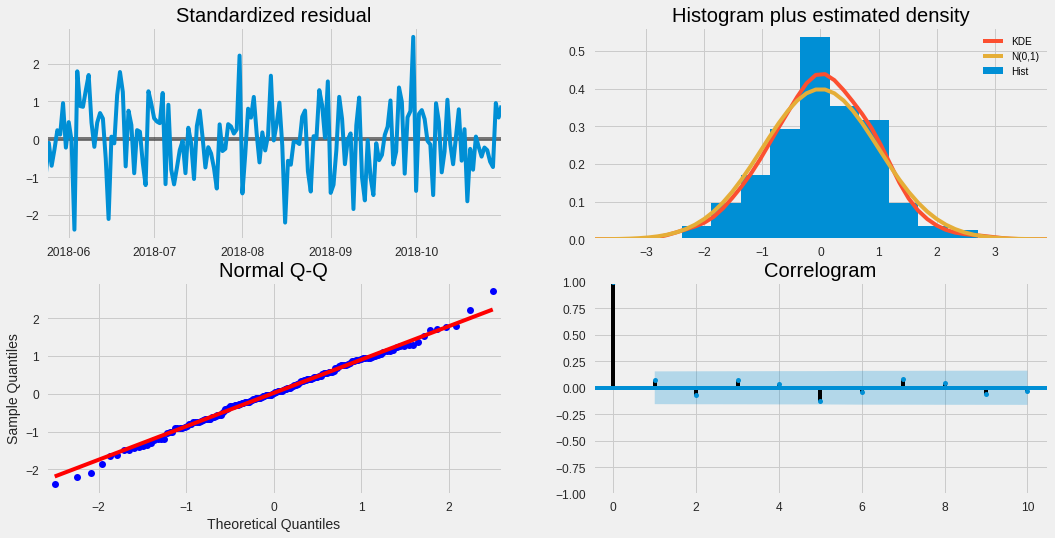

In [256]:
results_train.plot_diagnostics(figsize=(16, 8))
plt.show()

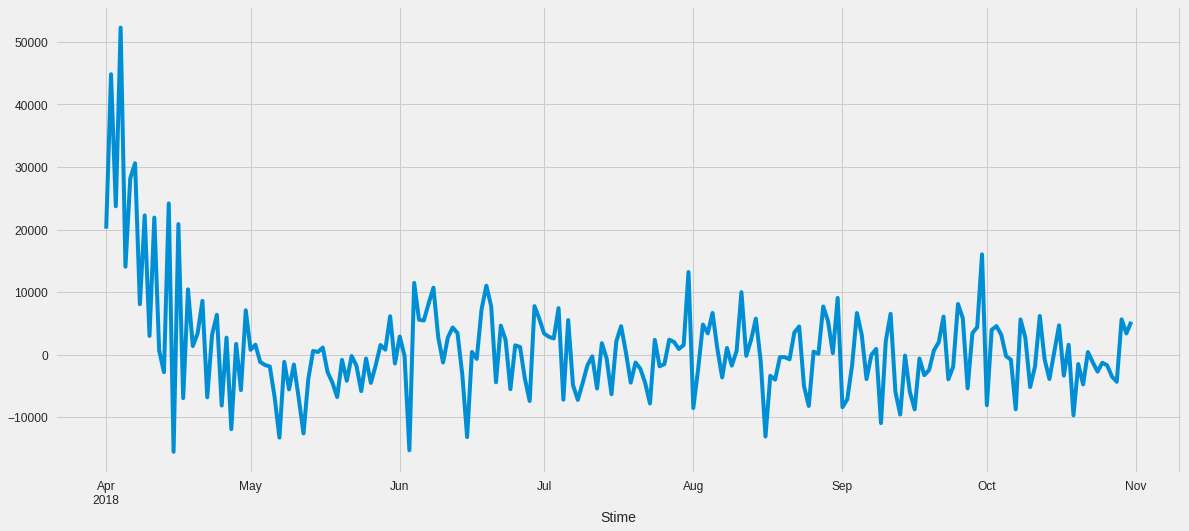

In [257]:
results_train.resid.plot()

In [258]:
print(results_train.resid.describe())

count      214.000000
mean      1170.461160
std       8525.132753
min     -15529.792987
25%      -3782.512137
50%        293.033955
75%       4249.905029
max      52279.245781
dtype: float64


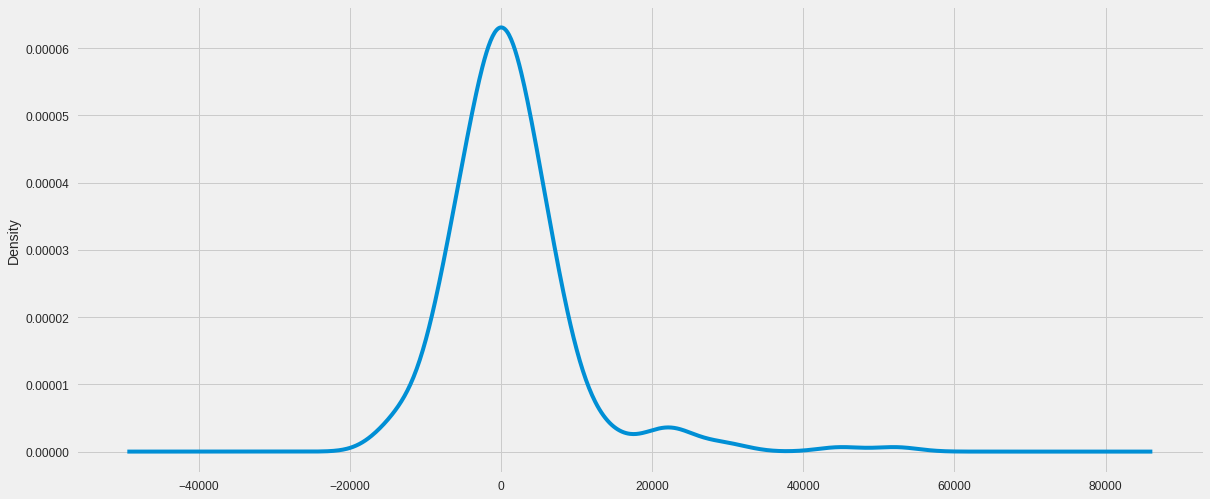

In [259]:
results_train.resid.plot(kind='kde')

In [260]:
X_test.tail()

,Quantity
Stime,
2019-01-27,38839
2019-01-28,48669
2019-01-29,52285
2019-01-30,48212
2019-01-31,59053


In [0]:

start_index = '2018-11-01'
end_index = '2019-01-31'
forecast_test = results_train.predict(start=start_index, end=end_index)

In [262]:
forecast_test.head()

2018-11-01    36031.173873
2018-11-02    54602.284943
2018-11-03    39049.421754
2018-11-04    50633.100451
2018-11-05    46473.035273
Freq: D, dtype: float64

In [0]:
forecast_test=forecast_test.to_frame(name=None)

In [264]:
forecast_test.head()

,0
2018-11-01,36031.173873
2018-11-02,54602.284943
2018-11-03,39049.421754
2018-11-04,50633.100451
2018-11-05,46473.035273


In [0]:
forecast_test=forecast_test.rename(columns = {0:'Quantity_predicated'})

In [266]:
forecast_test.head()

,Quantity_predicated
2018-11-01,36031.173873
2018-11-02,54602.284943
2018-11-03,39049.421754
2018-11-04,50633.100451
2018-11-05,46473.035273


In [0]:
index = pd.date_range(start="2018-11-01", end="2019-01-31")

In [0]:
forecast_test['Stime']=index

In [0]:
forecast_test.set_index('Stime', inplace=True)

In [270]:
forecast_test.head()

,Quantity_predicated
Stime,
2018-11-01,36031.173873
2018-11-02,54602.284943
2018-11-03,39049.421754
2018-11-04,50633.100451
2018-11-05,46473.035273


Test set error

In [0]:
forecast_test_error = X_test['Quantity']-forecast_test['Quantity_predicated']

In [272]:
forecast_test_error.isnull().any()

False

In [273]:
mean_forecast_test_error = np.mean(forecast_test_error)
print(mean_forecast_test_error)

1865.3997400177063


In [274]:
mean_absolute_test_error = np.mean( np.abs(forecast_test_error) )
print(mean_absolute_test_error)

5515.488363550941


In [275]:
mean_squared_test_error = np.mean(forecast_test_error*forecast_test_error)
print(mean_squared_test_error)

51719823.655012734


In [276]:
rmse_test = np.sqrt(mean_squared_test_error)
print(rmse_test)

7191.649578157485


In [0]:
def mean_absolute_percentage_test_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [278]:
MAPE= mean_absolute_percentage_test_error(X_test['Quantity'],forecast_test['Quantity_predicated'])
MAPE

11.323008712596518

In [279]:
X_test.shape,forecast_test.shape

((92, 1), (92, 1))

In [0]:
pjme_test=pd.merge(X_test,forecast_test, left_index=True, right_index=True)

In [281]:
MAPE= mean_absolute_percentage_test_error(pjme_test['Quantity'],pjme_test['Quantity_predicated'])
MAPE

11.323008712596518

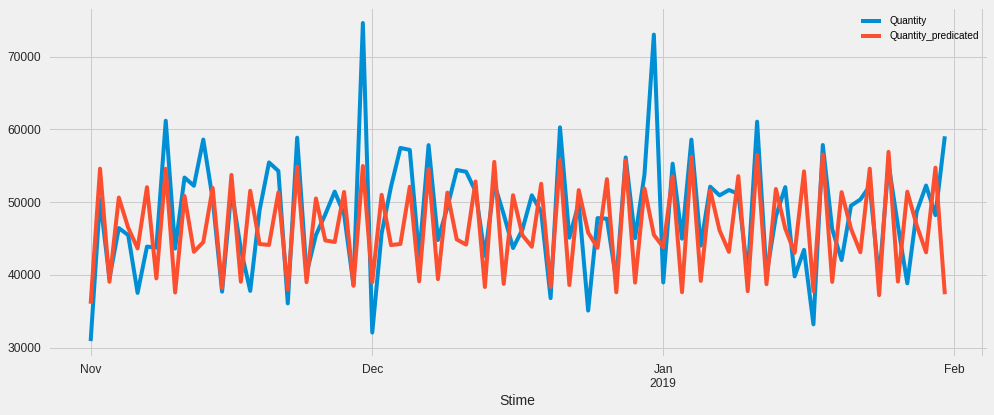

In [282]:
pjme_test.plot(figsize=(15, 6))
plt.show()

In [283]:
pjme_test.head()

,Quantity,Quantity_predicated
Stime,,
2018-11-01,30895,36031.173873
2018-11-02,50419,54602.284943
2018-11-03,39513,39049.421754
2018-11-04,46438,50633.100451
2018-11-05,45466,46473.035273


In [0]:
#pred_uc = results.get_forecast(steps=92)
#pred_ci = pred_uc.conf_int()

In [0]:
#pred_ci.tail(3)

In [0]:
#pred_uc=pred_uc.predicted_mean
#a=pred_uc.to_frame(name=None)

In [0]:
#a=a.rename(columns = {0:'Quantity_forecasted'})
#a.columns

In [0]:
#a.head()

train set error

In [0]:
start_index = '2018-04-01'
end_index = '2018-10-31'
forecast_train = results_train.predict(start=start_index, end=end_index)

In [0]:
forecast_train=forecast_train.to_frame(name=None)

In [0]:
forecast_train=forecast_train.rename(columns = {0:'Quantity_predicated'})

In [95]:
forecast_train.head()

,Quantity_predicated
Stime,
2018-04-01,0.000000
2018-04-02,-16209.181235
2018-04-03,16678.408412
2018-04-04,-15616.245781
2018-04-05,10150.390909


In [96]:
forecast_train.tail()

,Quantity_predicated
Stime,
2018-10-27,38671.517436
2018-10-28,49014.974588
2018-10-29,43666.128489
2018-10-30,40756.109041
2018-10-31,51632.438083


In [0]:
index = pd.date_range(start="2018-04-01", end="2018-10-31")
forecast_train['Stime']=index
forecast_train.set_index('Stime', inplace=True)

In [98]:
forecast_train.head()

,Quantity_predicated
Stime,
2018-04-01,0.000000
2018-04-02,-16209.181235
2018-04-03,16678.408412
2018-04-04,-15616.245781
2018-04-05,10150.390909


In [99]:
X_train.head()

,Quantity
Stime,
2018-04-01,20142
2018-04-02,28619
2018-04-03,40404
2018-04-04,36663
2018-04-05,24211


In [0]:
forecast_train_error = X_train['Quantity']-forecast_train['Quantity_predicated']

In [101]:
mean_forecast_train_error = np.mean(forecast_train_error)
print(mean_forecast_train_error)

1170.4611599092314


In [102]:
mean_absolute_train_error = np.mean( np.abs(forecast_train_error) )
print(mean_absolute_train_error)

5495.492717120272


In [103]:
mean_squared_train_error = np.mean(forecast_train_error*forecast_train_error)
print(mean_squared_test_error)

51719823.655012734


In [104]:
rmse_train = np.sqrt(mean_squared_train_error)
print(rmse_test)

7191.649578157485


In [0]:
def mean_absolute_percentage_train_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [106]:
MAPE= mean_absolute_percentage_train_error(X_train['Quantity'],forecast_train['Quantity_predicated'])
MAPE

15.01673469490309

In [0]:
pjme_train=pd.merge(X_train,forecast_train, left_index=True, right_index=True)

In [108]:
MAPE= mean_absolute_percentage_train_error(pjme_train['Quantity'],pjme_train['Quantity_predicated'])
MAPE

15.01673469490309

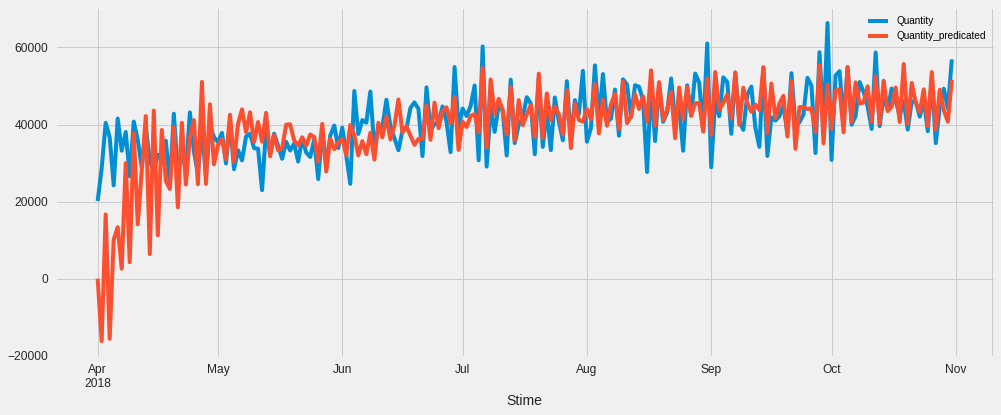

In [109]:
pjme_train.plot(figsize=(15, 6))
plt.show()

In [0]:
all = pd.concat([pjme_train,pjme_test])

In [111]:
all.head()

,Quantity,Quantity_predicated
Stime,,
2018-04-01,20142,0.000000
2018-04-02,28619,-16209.181235
2018-04-03,40404,16678.408412
2018-04-04,36663,-15616.245781
2018-04-05,24211,10150.390909


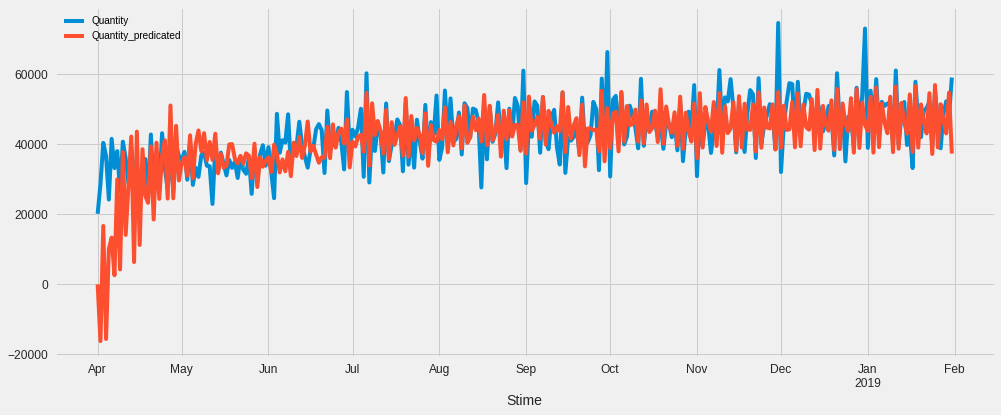

In [112]:
all.plot(figsize=(15, 6))
plt.show()

In [0]:
start_index = '2019-01-28'
end_index = '2019-02-23'
forecast = results_train.predict(start=start_index, end=end_index)

In [114]:
forecast=forecast.to_frame(name=None)
forecast=forecast.rename(columns = {0:'Quantity_predicated'})
forecast.head()

,Quantity_predicated
2019-01-28,46819.213497
2019-01-29,43100.497187
2019-01-30,54737.927995
2019-01-31,37340.116860
2019-02-01,56724.740237


In [0]:
index = pd.date_range(start="2019-01-28", end="2019-02-23")
forecast['Stime']=index
forecast.set_index('Stime', inplace=True)

In [116]:
forecast.head()

,Quantity_predicated
Stime,
2019-01-28,46819.213497
2019-01-29,43100.497187
2019-01-30,54737.927995
2019-01-31,37340.116860
2019-02-01,56724.740237


In [0]:
all_l = pd.concat([pjme_train,pjme_test,forecast])

In [118]:
all_l.tail()

,Quantity,Quantity_predicated
Stime,,
2019-02-19,NaN,42500.010413
2019-02-20,NaN,55433.398200
2019-02-21,NaN,36888.098849
2019-02-22,NaN,57630.585151
2019-02-23,NaN,39059.059420


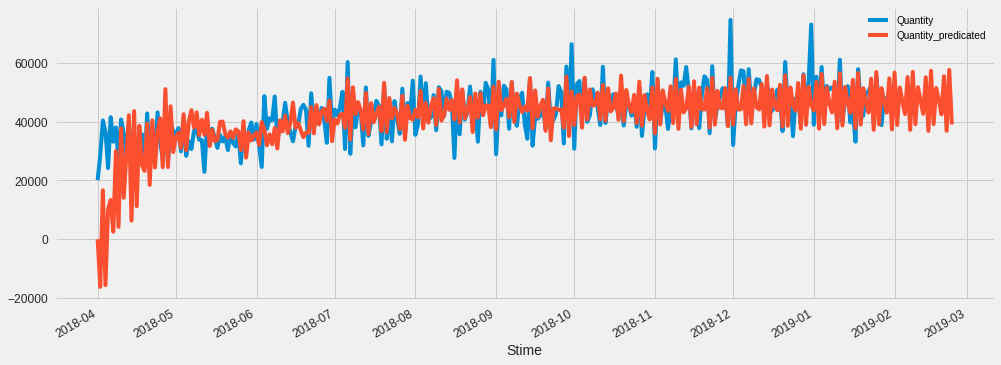

In [119]:
all_l.plot(figsize=(15, 6))
plt.show()